<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/HI_SOC_munging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c('data.table','ggplot2','magrittr','googledrive','openxlsx','stringr'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [ ]:
library(data.table)
library(ggplot2)
library(magrittr)
library(googledrive)
library(openxlsx)
library(stringr)

In [ ]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=900cffddbbd19499f48adac717159098&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQnFYbDNCeHhQRXkxem1kNGVMV1NJNFNEYjNUSEtDLUUtalJwU3dTZVprbHdudENmNkw1MzI1XzFZYTFkVG9GUSIsInN0YXRlIjoiOTAwY2ZmZGRiYmQxOTQ5OWY0OGFkYWM3MTcxNTkwOTgifQ==


Soil Health Data - published version but lacking more recent samples

In [ ]:
# https://docs.google.com/spreadsheets/d/1mCucq9SaugOtadGLqL5BH9yLMgZcJlcn/edit?usp=drive_link&ouid=116908933518305479206&rtpof=true&sd=true
# drive_download(file = as_id('1mCucq9SaugOtadGLqL5BH9yLMgZcJlcn'), path = '/content/SH_database.xlsx', overwrite = TRUE)

Soil Health Database master version - still missing hundreds of more recent samples

In [ ]:
# https://docs.google.com/spreadsheets/d/1Fy7yqIll2RTXDbLgb8ENBAbWaeton7skdC9M0vkripM/edit#gid=0
drive_download(file = as_id('1Fy7yqIll2RTXDbLgb8ENBAbWaeton7skdC9M0vkripM'), path = '/content/SH_master.csv', overwrite = TRUE)

Auto-refreshing stale OAuth token.

File downloaded:

• Copy of HSH_MASTER_DATABASEallsamples
  <id: 1Fy7yqIll2RTXDbLgb8ENBAbWaeton7skdC9M0vkripM>

Saved locally as:

• /content/SH_master.csv



FIA Data

In [ ]:
# https://drive.google.com/file/d/1wGx6RbEyorRCy9Xhm_WdfpHmAUbkuzMk/view?usp=drive_link
drive_download(file = as_id('1wGx6RbEyorRCy9Xhm_WdfpHmAUbkuzMk'), path = '/content/FIA.csv', overwrite = TRUE)

FIA_dt <- read.csv('/content/FIA.csv') %>% as.data.table()
head(FIA_dt)

FIA_dt[,plot_hole_id := paste0('FIA_',PLOT)]
FIA_dt[,soil_column_id := paste0('FIA_',PLOT)]

File downloaded:

• 2023_11_01FIA_soilcstocks.csv <id: 1wGx6RbEyorRCy9Xhm_WdfpHmAUbkuzMk>

Saved locally as:

• /content/FIA.csv



PLOT,INVYR,CN_loc,STATECD_loc,COUNTYCD_loc,SUBP_loc,INV_VST_NBR_loc,PLT_CN_loc,CYCLE_loc,CONDID,⋯,TOPO_POSITION_PNW,REMPER,NBP_CN,CONSERVATION_ZONE,Sum_C_TOTAL_PCT,NOTES_FLAG,SOC_Mg_Ac,SOC_Mg_Ha,Sum_SOC_Mg_Ha,Proportion_C_Stock
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,NA,4.819775e+13,,12.16,,35.07369,86.66884,298.8214,0.2900356
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,NA,4.819775e+13,,12.16,,33.76894,83.44473,298.8214,0.2792462
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,NA,4.819775e+13,,12.16,,20.08232,49.62441,298.8214,0.1660671
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,NA,4.819775e+13,,12.16,,18.03497,44.56532,298.8214,0.1491370
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,NA,4.819775e+13,,12.16,,13.96901,34.51811,298.8214,0.1155142
1076,2019,1.219123e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,6.6,4.819776e+13,P,32.84,,33.67137,83.20364,325.0640,0.2559608


Soil C Database Data

In [ ]:
# https://drive.google.com/file/d/1-6qbEZ7Fg8hBKhFf8KLh1EFcDVaudyZF/view?usp=drive_link

# https://docs.google.com/spreadsheets/d/1sQNRTzcJtP8-qqjD995maEcKe9m_f7hM5ddwI-D4iH4/edit?usp=sharing
drive_download(file = as_id('1sQNRTzcJtP8-qqjD995maEcKe9m_f7hM5ddwI-D4iH4'), path = '/content/HISOC_dbase.csv', overwrite = TRUE)

File downloaded:

• HI_soil_C_crow_data_REV <id: 1sQNRTzcJtP8-qqjD995maEcKe9m_f7hM5ddwI-D4iH4>

Saved locally as:

• /content/HISOC_dbase.csv



In [ ]:
SH_master_dt <- read.csv('/content/SH_master.csv') %>% as.data.table()

setnames(SH_master_dt, as.character(unlist(SH_master_dt[1,])))
SH_master_dt <- SH_master_dt[-1]
setnames(SH_master_dt, tolower(names(SH_master_dt)))
head(SH_master_dt)

number,site_name,site_number,plot_name,plot_area,depth_top,depth_bottom,soil_column_id,replicate,latitude,⋯,wsa_macro,bd,shs,assessment,c_n,doc_don,pmn,status,hyperlinks,last updated
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Twin Bridge,1,1,,0,15,SH1-01,,21.58397,⋯,67.1985,0.77,,,9.882352941,6.67,12.1,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022
2,Twin Bridge,1,1,,0,15,SH2-01,,21.58381,⋯,58.1777,0.84,,,9.875,35.9,11.67,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022
3,Twin Bridge,1,1,,0,15,SH3-01,,21.58372,⋯,52.2895,1.05,,,9.4375,16.3,14.43,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022
4,Twin Bridge,1,2,,0,15,SH4-01,,21.58423,⋯,83.4255,0.85,,,9.363636364,3.83,37.46,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022
5,Twin Bridge,1,2,,0,15,SH5-01,,21.58416,⋯,75.7849,1.026,,,9.260869565,3.88,31.7,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022
6,Twin Bridge,1,2,,0,15,SH6-01,,21.58406,⋯,77.5173,1.0749,,,9.952380952,3.69,35.14,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022


In [ ]:
names(SH_master_dt)

[1] "number"                                    
 [2] "site_name"                                 
 [3] "site_number"                               
 [4] "plot_name"                                 
 [5] "plot_area"                                 
 [6] "depth_top "                                
 [7] "depth_bottom "                             
 [8] "soil_column_id"                            
 [9] "replicate"                                 
[10] "latitude"                                  
[11] "longitude"                                 
[12] "primary_project"                           
[13] "secondary_project"                         
[14] "tertiary project"                          
[15] "land_ownership"                            
[16] "old_sh_1"                                  
[17] "sh_1"                                      
[18] "barcode"                                   
[19] "date_sampled"                              
[20] "island"                                    
[21] "current_land_use"                          
[22] "years_under_current_land_use"              
[23] "most_previous_land_use"                    
[24] "years_under_most_previous _land_use"       
[25] "additional_previous _land_use "            
[26] "years_under_additional_previous _land_use" 
[27] "additional_previous_land_use_2"            
[28] "years_under_additional_previous_land_use_2"
[29] "additional_previous_land_use_3"            
[30] "years_under_additional_previous_land_use_3"
[31] "current_plant_cover"                       
[32] "previous_crop_cover"                       
[33] "tillage"                                   
[34] "tillage_frequency"                         
[35] "herbicide"                                 
[36] "pesticide"                                 
[37] "irrigation_type"                           
[38] "additional_soil_cover"                     
[39] "soil_series"                               
[40] "management_category"                       
[41] "pial_none"                                 
[42] "distlevel"                                 
[43] "order"                                     
[44] "minerals"                                  
[45] "swc_fm"                                    
[46] "swc_ad"                                    
[47] "toc"                                       
[48] "tn"                                        
[49] "co2_burst"                                 
[50] "beta_glucosidase"                          
[51] "beta_glucosaminidase"                      
[52] "pnm_init"                                  
[53] "pmn_fin"                                   
[54] "ph"                                        
[55] "doc"                                       
[56] "tdn"                                       
[57] "din"                                       
[58] "don"                                       
[59] "hwec"                                      
[60] "hwen"                                      
[61] "whc"                                       
[62] "wsa_mega"                                  
[63] "wsa_macro"                                 
[64] "bd"                                        
[65] "shs"                                       
[66] "assessment"                                
[67] "c_n"                                       
[68] "doc_don"                                   
[69] "pmn"                                       
[70] "status"                                    
[71] "hyperlinks"                                
[72] "last updated"

In [ ]:
HISOC_dbase_dt <- read.csv('/content/HISOC_dbase.csv') %>% as.data.table()
head(HISOC_dbase_dt)

PubID,DataID,Date.sampled,Island,Location,Latitude,Longitude,Land.use,Soil.cover,soil.order,⋯,Previous.land.use,Previous.plant.cover,Fertilizer.type,Fertilizer.rate..not.required.,Tillage.type,Tillage.frequency,Herbicide,Pesticide,Irrigation.type,Additional.soil.cover
<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>
3,1,1995,Hawaii,Honaunau Forest,19.4312,-155.855,forest,"F. hudei, A. koa",Histosol,⋯,NA,NA,NA,NA,NA,NA,NA,NA,,NA
3,2,1995,Hawaii,Honaunau Forest,19.4333,-155.847,forest,"F. hudei, A. koa",Histosol,⋯,NA,NA,NA,NA,NA,NA,NA,NA,,NA
3,3,1995,Hawaii,Honaunau Forest,19.4891,-155.863,forest,"F. hudei, A. koa",Andisol,⋯,NA,NA,NA,NA,NA,NA,NA,NA,,NA
3,4,1995,Hawaii,Honaunau Forest,19.4353,-155.837,forest,"F. hudei, A. koa",Histosol,⋯,NA,NA,NA,NA,NA,NA,NA,NA,,NA
3,5,1995,Hawaii,Honaunau Forest,19.4874,-155.841,forest,"F. hudei, A. koa",Andisol,⋯,NA,NA,NA,NA,NA,NA,NA,NA,,NA
3,6,1995,Hawaii,Honaunau Forest,19.4872,-155.831,forest,"F. hudei, A. koa",Andisol,⋯,NA,NA,NA,NA,NA,NA,NA,NA,,NA


In [ ]:
names(HISOC_dbase_dt)

[1] "PubID"                                
 [2] "DataID"                               
 [3] "Date.sampled"                         
 [4] "Island"                               
 [5] "Location"                             
 [6] "Latitude"                             
 [7] "Longitude"                            
 [8] "Land.use"                             
 [9] "Soil.cover"                           
[10] "soil.order"                           
[11] "soil.series"                          
[12] "soil.taxonomy"                        
[13] "group_by_id"                          
[14] "depth_upper_cm"                       
[15] "depth_lower_cm"                       
[16] "soil.depth..m."                       
[17] "X..C"                                 
[18] "X..C.1"                               
[19] "C_perc"                               
[20] "TC..Mg.C.ha."                         
[21] "bulk.density..g.cm3.or.Mg.m3.or.kg.L."
[22] "C.N"                                  
[23] "soil.pH"                              
[24] "X..N"                                 
[25] "TN..Mg.ha."                           
[26] "P..kg.ha."                            
[27] "elevation..m."                        
[28] "MAT..C."                              
[29] "MAP..mm."                             
[30] "soil.sampling"                        
[31] "Previous.land.use"                    
[32] "Previous.plant.cover"                 
[33] "Fertilizer.type"                      
[34] "Fertilizer.rate..not.required."       
[35] "Tillage.type"                         
[36] "Tillage.frequency"                    
[37] "Herbicide"                            
[38] "Pesticide"                            
[39] "Irrigation.type"                      
[40] "Additional.soil.cover"

In [ ]:
missing_group_by <- HISOC_dbase_dt[group_by_id == '',]

In [ ]:
missing_group_by[, group_by_id := 1]

# Initialize field ID
missing_group_by[, group_by_id := cumsum(depth_upper_cm <= shift(depth_upper_cm, fill = 0)), by = group_by_id]

In [ ]:
manual_group_by <- HISOC_dbase_dt[group_by_id != '',]

In [ ]:
manual_group_by$group_by_id <- (manual_group_by$group_by_id %>% factor() %>% as.numeric) + max(missing_group_by$group_by_id %>% as.numeric)

In [ ]:
HISOC_dbase_dt <- list(manual_group_by,missing_group_by) %>% rbindlist

In [ ]:
HISOC_dbase_dt$soil_column_id <- paste0("HISOC",HISOC_dbase_dt$group_by_id)

In [ ]:
FIA_dt$soil_column_id %>% table %>% unlist %>% table

.
 5 
86 

In [ ]:
SH_master_dt$soil_column_id %>% table %>% unlist %>% table

.
  1   2   3   4   6  10  15  24 
482   9  75   1  21   1   4   1 

In [ ]:
HISOC_dbase_dt$soil_column_id  %>% table %>% unlist %>% table

.
  1   2   3   4   5   6   7   8   9  10  11  12 
284 124  71  64 285 419   5   2   2   1   1  37 

In [ ]:
# soil_column_id

In [ ]:
# SheetNames<-getSheetNames('/content/SH_database.xlsx')
# print(SheetNames)
# data_list <- SheetNames %>%
#              lapply(function(x){
#              openxlsx::read.xlsx('/content/SH_database.xlsx', x) %>% data.table
#              })

# names(data_list) <- SheetNames

In [ ]:
# SH_dt <- data_list['Sheet1'] %>% as.data.table()

In [ ]:
# setnames(SH_dt, gsub("^Sheet1\\.", "", names(SH_dt)))

# setnames(SH_dt, tolower(names(SH_dt)))

# SH_dt[, names(SH_dt) := lapply(.SD, function(x) if(is.character(x)) tolower(x) else x), .SDcols = names(SH_dt)]

# SH_dt[current_land_use == "crop land", current_land_use := "cropland"]

In [ ]:
SH_master_dt[, site_name := tolower(gsub("[[:punct:]]", "", site_name))]

In [ ]:
SH_master_dt[current_land_use == "crop land", current_land_use := "cropland"]

In [ ]:
names(SH_master_dt)

[1] "number"                                    
 [2] "site_name"                                 
 [3] "site_number"                               
 [4] "plot_name"                                 
 [5] "plot_area"                                 
 [6] "depth_top "                                
 [7] "depth_bottom "                             
 [8] "soil_column_id"                            
 [9] "replicate"                                 
[10] "latitude"                                  
[11] "longitude"                                 
[12] "primary_project"                           
[13] "secondary_project"                         
[14] "tertiary project"                          
[15] "land_ownership"                            
[16] "old_sh_1"                                  
[17] "sh_1"                                      
[18] "barcode"                                   
[19] "date_sampled"                              
[20] "island"                                    
[21] "current_land_use"                          
[22] "years_under_current_land_use"              
[23] "most_previous_land_use"                    
[24] "years_under_most_previous _land_use"       
[25] "additional_previous _land_use "            
[26] "years_under_additional_previous _land_use" 
[27] "additional_previous_land_use_2"            
[28] "years_under_additional_previous_land_use_2"
[29] "additional_previous_land_use_3"            
[30] "years_under_additional_previous_land_use_3"
[31] "current_plant_cover"                       
[32] "previous_crop_cover"                       
[33] "tillage"                                   
[34] "tillage_frequency"                         
[35] "herbicide"                                 
[36] "pesticide"                                 
[37] "irrigation_type"                           
[38] "additional_soil_cover"                     
[39] "soil_series"                               
[40] "management_category"                       
[41] "pial_none"                                 
[42] "distlevel"                                 
[43] "order"                                     
[44] "minerals"                                  
[45] "swc_fm"                                    
[46] "swc_ad"                                    
[47] "toc"                                       
[48] "tn"                                        
[49] "co2_burst"                                 
[50] "beta_glucosidase"                          
[51] "beta_glucosaminidase"                      
[52] "pnm_init"                                  
[53] "pmn_fin"                                   
[54] "ph"                                        
[55] "doc"                                       
[56] "tdn"                                       
[57] "din"                                       
[58] "don"                                       
[59] "hwec"                                      
[60] "hwen"                                      
[61] "whc"                                       
[62] "wsa_mega"                                  
[63] "wsa_macro"                                 
[64] "bd"                                        
[65] "shs"                                       
[66] "assessment"                                
[67] "c_n"                                       
[68] "doc_don"                                   
[69] "pmn"                                       
[70] "status"                                    
[71] "hyperlinks"                                
[72] "last updated"

In [ ]:
# SH_master_dt$latitude[921:935] <- SH_master_dt$latitude[921:935] %>% substr(.,1,11)

In [ ]:
sum(is.na(SH_master_dt$longitude))

[1] 0

Approx coordinates added by guessng: Add kakoo oiwi coordinates (from NRDS): -157.8199032181131 21.4313439248623, add Neem Farm Waimea Kauai (assuming this: https://www.waikahefarms.com/) coordinates: 21.967096, -159.692819

In [ ]:
colnames(SH_master_dt)

[1] "number"                                    
 [2] "site_name"                                 
 [3] "site_number"                               
 [4] "plot_name"                                 
 [5] "plot_area"                                 
 [6] "depth_top "                                
 [7] "depth_bottom "                             
 [8] "soil_column_id"                            
 [9] "replicate"                                 
[10] "latitude"                                  
[11] "longitude"                                 
[12] "primary_project"                           
[13] "secondary_project"                         
[14] "tertiary project"                          
[15] "land_ownership"                            
[16] "old_sh_1"                                  
[17] "sh_1"                                      
[18] "barcode"                                   
[19] "date_sampled"                              
[20] "island"                                    
[21] "current_land_use"                          
[22] "years_under_current_land_use"              
[23] "most_previous_land_use"                    
[24] "years_under_most_previous _land_use"       
[25] "additional_previous _land_use "            
[26] "years_under_additional_previous _land_use" 
[27] "additional_previous_land_use_2"            
[28] "years_under_additional_previous_land_use_2"
[29] "additional_previous_land_use_3"            
[30] "years_under_additional_previous_land_use_3"
[31] "current_plant_cover"                       
[32] "previous_crop_cover"                       
[33] "tillage"                                   
[34] "tillage_frequency"                         
[35] "herbicide"                                 
[36] "pesticide"                                 
[37] "irrigation_type"                           
[38] "additional_soil_cover"                     
[39] "soil_series"                               
[40] "management_category"                       
[41] "pial_none"                                 
[42] "distlevel"                                 
[43] "order"                                     
[44] "minerals"                                  
[45] "swc_fm"                                    
[46] "swc_ad"                                    
[47] "toc"                                       
[48] "tn"                                        
[49] "co2_burst"                                 
[50] "beta_glucosidase"                          
[51] "beta_glucosaminidase"                      
[52] "pnm_init"                                  
[53] "pmn_fin"                                   
[54] "ph"                                        
[55] "doc"                                       
[56] "tdn"                                       
[57] "din"                                       
[58] "don"                                       
[59] "hwec"                                      
[60] "hwen"                                      
[61] "whc"                                       
[62] "wsa_mega"                                  
[63] "wsa_macro"                                 
[64] "bd"                                        
[65] "shs"                                       
[66] "assessment"                                
[67] "c_n"                                       
[68] "doc_don"                                   
[69] "pmn"                                       
[70] "status"                                    
[71] "hyperlinks"                                
[72] "last updated"

In [ ]:
SH_master_dt$latitude

[1] "21.58397"    "21.58381"    "21.58372"    "21.58423"    "21.58416"   
  [6] "21.58406"    "21.55381"    "21.55388"    "21.55401"    "21.55416"   
 [11] "21.55423"    "21.55426"    "21.56661"    "21.56656"    "21.56652"   
 [16] "21.56003"    "21.56009"    "21.560029"   "21.54432"    "21.54426"   
 [21] "21.54426"    "21.5378"     "21.53766"    "21.53752"    "21.45077"   
 [26] "21.45081"    "21.45084"    "21.40554"    "21.40554"    "21.40547"   
 [31] "21.41635"    "21.41628"    "21.4163"     "20.76311"    "20.76298"   
 [36] "20.76273"    "20.86005"    "20.86044"    "20.86356"    "20.91012"   
 [41] "20.91"       "20.91004"    "20.88252"    "20.88168"    "20.88161"   
 [46] "20.77149"    "20.77161"    "20.77159"    "20.77189"    "20.77195"   
 [51] "20.77201"    "20.80217"    "20.80224"    "20.80221"    "20.83038"   
 [56] "20.83047"    "20.83037"    "21.15251"    "21.15258"    "21.15256"   
 [61] "21.13774"    "21.13776"    "21.13771"    "21.1433"     "21.1432"    
 [66] "21.14309"    "21.901054"   "21.901054"   "21.901054"   "21.900555"  
 [71] "21.900555"   "21.900555"   "21.901054"   "21.901054"   "21.901054"  
 [76] "21.900555"   "21.900555"   "21.900555"   "21.901054"   "21.901054"  
 [81] "21.901054"   "21.900555"   "21.900555"   "21.900555"   "21.901162"  
 [86] "21.901162"   "21.901162"   "22.094126"   "22.094126"   "22.094126"  
 [91] "22.088874"   "22.088874"   "22.088874"   "21.967096"   "21.967096"  
 [96] "21.967096"   "21.9670959"  "21.9670959"  "21.9670959"  "21.9670961" 
[101] "21.9670961"  "21.9670961"  "21.3341"     "21.3341"     "21.3341"    
[106] "21.3347"     "21.3347"     "21.3347"     "21.3338"     "21.3338"    
[111] "21.3338"     "21.3649"     "21.3649"     "21.3649"     "21.3617"    
[116] "21.3617"     "21.3617"     "21.3627"     "21.3627"     "21.3627"    
[121] "21.361"      "21.361"      "21.361"      "21.3336"     "21.3336"    
[126] "21.3336"     "21.3328"     "21.3328"     "21.3328"     "21.3346"    
[131] "21.3346"     "21.3346"     "21.3346"     "21.3346"     "21.3346"    
[136] "21.3326"     "21.3326"     "21.3326"     "21.3357"     "21.3357"    
[141] "21.3357"     "21.389083"   "21.389083"   "21.389083"   "21.389083"  
[146] "21.389083"   "21.3890829"  "21.3890829"  "21.3890829"  "21.3890829" 
[151] "21.3890829"  "21.581033"   "21.580917"   "21.580783"   "21.58085"   
[156] "21.580883"   "21.580917"   "20.910033"   "20.91005"    "20.91"      
[161] "20.913667"   "20.913667"   "20.913717"   "20.913717"   "20.913867"  
[166] "20.913867"   "21.453967"   "21.453883"   "21.453817"   "21.453933"  
[171] "21.453933"   "21.453933"   "21.433867"   "21.433933"   "21.433983"  
[176] "21.433883"   "21.433917"   "21.43395"    "21.561083"   "21.561017"  
[181] "21.560967"   "21.561133"   "21.5611"     "21.561167"   "20.857743"  
[186] "20.801147"   "21.504565"   "21.504565"   "21.504565"   "21.6336"    
[191] "21.6336"     "21.6336"     "21.630939"   "21.630939"   "21.630939"  
[196] "21.629969"   "21.629969"   "21.629969"   "21.636961"   "21.636961"  
[201] "21.636961"   "21.6203"     "21.6203"     "21.6203"     "21.640511"  
[206] "21.640511"   "21.640511"   "21.590489"   "21.590489"   "21.590489"  
[211] "21.453967"   "21.453967"   "21.453967"   "21.4539669"  "21.4539669" 
[216] "21.4539669"  "21.4539668"  "21.4539668"  "21.4539668"  "21.4539671" 
[221] "21.4539671"  "21.4539671"  "21.44547"    "21.44547"    "21.44547"   
[226] "21.44547"    "21.44547"    "21.44547"    "21.44547"    "21.44547"   
[231] "21.44547"    "21.44547"    "21.44547"    "21.44547"    "21.373186"  
[236] "21.373186"   "21.373186"   "21.373186"   "21.373186"   "21.373186"  
[241] "21.373186"   "21.373186"   "21.373186"   "21.373186"   "21.373186"  
[246] "21.373186"   "21.4127"     "21.4127"     "21.4127"     "21.4127"    
[251] "21.4127"     "21.4127"     "21.4127"     "21.4127"     "21.4127"    
[256] "21.4127"     "21.4127"     "21.4127"     "21.45077"    "21.45077"   
[261] "21.45077"    "21.45081"    "21.45081"    "2

In [ ]:
SH_master_dt[, unique_id := .I]

SH_master_dt[, unique_id := paste0("SH", unique_id)]

head(SH_master_dt)

number,site_name,site_number,plot_name,plot_area,depth_top,depth_bottom,soil_column_id,replicate,latitude,⋯,bd,shs,assessment,c_n,doc_don,pmn,status,hyperlinks,last updated,unique_id
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,twin bridge,1,1,,0,15,SH1-01,,21.58397,⋯,0.77,,,9.882352941,6.67,12.1,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022,SH1
2,twin bridge,1,1,,0,15,SH2-01,,21.58381,⋯,0.84,,,9.875,35.9,11.67,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022,SH2
3,twin bridge,1,1,,0,15,SH3-01,,21.58372,⋯,1.05,,,9.4375,16.3,14.43,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022,SH3
4,twin bridge,1,2,,0,15,SH4-01,,21.58423,⋯,0.85,,,9.363636364,3.83,37.46,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022,SH4
5,twin bridge,1,2,,0,15,SH5-01,,21.58416,⋯,1.026,,,9.260869565,3.88,31.7,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022,SH5
6,twin bridge,1,2,,0,15,SH6-01,,21.58406,⋯,1.0749,,,9.952380952,3.69,35.14,Done,https://docs.google.com/spreadsheets/d/1pQo3yk7sTzfCeFaGWk2K4cDxDQ7GfXOt71b2iiVU0fA/edit#gid=2114689344,3/9/2022,SH6


In [ ]:
# # Convert character/string "NA"s to actual NA values
# SH_master_dt[latitude == "NA", latitude := NA]
# SH_master_dt[longitude == "NA", longitude := NA]


Island Harvest: using these coordinates: 20.222911, -155.778804



using 21.518554, -157.852945 for kualoa ranch

using 20.227278, -155.758747 for kapanaia farms

using 21.335436, -157.714816 for thrive farm

using 21.551691, -158.134685 for waialua coffee

using 21.586282, -158.106080 for diamond island farm

using 21.586007, -158.105091 for kokua

In [ ]:
nrow(SH_master_dt[site_name == ""])

[1] 0

removed kona macnuts, susans nuts, milolii, kialoakaa, g tree, growing together, lonohana, hoomau, kemoo

In [ ]:
# SH_master_dt[, .(number, latitude, longitude, depth_top, depth_bottom, site_name, site_number, plot_name)]

In [ ]:
# SH_dt[, longitude := as.numeric(longitude)]
# SH_dt[longitude > 0, longitude := -longitude]

In [ ]:
sum(is.na(SH_master_dt$bd) | SH_master_dt$bd == "") %>% print

[1] 524


In [ ]:
sum(!is.na(SH_master_dt$bd) | SH_master_dt$bd == "") %>% print

[1] 949


In [ ]:
unique(SH_master_dt$bd)

[1] "0.77"   "0.84"   "1.05"   "0.85"   "1.026"  "1.0749" "0.9874" "0.889" 
  [9] "0.8699" "0.6721" "0.7653" "0.8545" "1.113"  "1.0315" "1.0639" "1.2584"
 [17] "1.1625" "1.0823" "0.8833" "0.897"  "1.0941" "0.9177" "0.8759" "0.9258"
 [25] "0.9452" "0.7126" "0.9626" "0.7586" "0.7594" "0.7729" "0.9375" "1.0717"
 [33] "1.019"  "0.6053" "0.3944" "0.6129" "0.7676" "0.8824" "0.9459" "1.2575"
 [41] "1.194"  "1.1142" "0.9883" "0.9865" "0.9957" "0.5011" "0.4188" "0.5474"
 [49] "0.3994" "0.4192" "0.3773" "0.245"  "0.194"  "0.2329" "0.4818" "0.5476"
 [57] "0.5149" "0.9027" "0.9113" "0.9053" "1.1031" "1.1386" "1.1"    "1.0325"
 [65] "0.7999" "0.9131" ""       "0.87"   "1.04"   "0.98"   "1.06"   "0.89"  
 [73] "0.92"   "1.07"   "1.03"   "1.01"   "1.34"   "1.09"   "0.74"   "1.19"  
 [81] "1.33"   "1.6"    "1.65"   "1.24"   "0.82"   "0.99"   "0.94"   "0.9"   
 [89] "1.31"   "0.96"   "0.86"   "0.63"   "0.65"   "0.68"   "0.51"   "0.75"  
 [97] "0.79"   "0.76"   "0.56"   "0.73"   "0.78"   "0.66"   "0.67"   "0.72"  
[105] "0.7"    "0.8"    "0.69"   "0.62"   "0.64"   "0.71"   "0.91"   "0.6"   
[113] "1.37"   "1.02"   "1.26"   "1.28"   "0.61"   "0.80"   "0.83"   "1.20"  
[121] "1.29"   "1.10"   "1.15"   "0.70"   "0.55"   "1.13"   "1.22"   "1.16"  
[129] "1.35"   "1.11"   "1.30"   "1.14"   "1.32"   "1.40"   "0.88"   "1.23"  
[137] "1.17"   "1.12"   "1.21"   "0.93"   "0.81"   "0.95"   "1.00"   "0.97"  
[145] "1.08"   "0.90"   "1.80"   "1.62"   "1.61"   "0.37"   "0.50"   "0.43"  
[153] "0.53"   "0.00"   "1.38"   "0.58"   "0.54"   "0.49"   "0.35"   "0.46"  
[161] "0.47"   "0.48"   "0.39"   "0.33"   "0.45"   "1.48"   "1.18"   "1.36"  
[169] "1.52"   "1.25"

calculate C stocks for the rows that have bd; estimate bd for all others

In [ ]:
# SH_dt[, SOC_stock := (toc/100) * bd * (depth_bottom-depth_top)]

In [ ]:
# SH_dt[, SOC_stock_kg_m2 := (depth_bottom-depth_top) * (1/100) * bd * 1000 * (toc/100)]


In [ ]:
# SH_dt[, SOC_stock_Mg_ha:= SOC_stock_kg_m2 * 10]


In [ ]:
# SH_dt$depth_bottom %>% unique

In [ ]:
# table(SH_dt$depth_bottom)

In [ ]:
# SH_dt$minerals %>% unique
# SH_dt$management_category %>% unique
# SH_dt$current_land_use %>% unique

In [ ]:
# table(SH_dt$management_category)

In [ ]:
# table(SH_dt$current_land_use)

In [ ]:
#current_land_use
#pial_none
#minerals
#SOC_stock_Mg_ha
#depth_bottom == 15

In [ ]:
# SH_dt_test <- SH_dt[depth_bottom == 15 & minerals == "lac" & current_land_use == "agroforestry"]

#SH_dt_test

below is summaries by land use and mineralogy only, not PIAL

In [ ]:
# SH_dt_sub <- SH_dt[depth_bottom == 15]

# summary_table <- SH_dt_sub[, .(
#   mean_SOC_stock_Mg_ha = mean(SOC_stock_Mg_ha,  na.rm = TRUE),
#   n_obs = .N,
#   se_SOC_stock_Mg_ha = sd(SOC_stock_Mg_ha, na.rm = TRUE) / sqrt(.N)
# ), by = .(current_land_use, minerals)]

# print(summary_table)

In [ ]:
colnames(HISOC_dbase_dt) <- tolower(colnames(HISOC_dbase_dt))
colnames(HISOC_dbase_dt) <- gsub("\\.+", "_", colnames(HISOC_dbase_dt))

names(HISOC_dbase_dt)

[1] "pubid"                               
 [2] "dataid"                              
 [3] "date_sampled"                        
 [4] "island"                              
 [5] "location"                            
 [6] "latitude"                            
 [7] "longitude"                           
 [8] "land_use"                            
 [9] "soil_cover"                          
[10] "soil_order"                          
[11] "soil_series"                         
[12] "soil_taxonomy"                       
[13] "group_by_id"                         
[14] "depth_upper_cm"                      
[15] "depth_lower_cm"                      
[16] "soil_depth_m_"                       
[17] "x_c"                                 
[18] "x_c_1"                               
[19] "c_perc"                              
[20] "tc_mg_c_ha_"                         
[21] "bulk_density_g_cm3_or_mg_m3_or_kg_l_"
[22] "c_n"                                 
[23] "soil_ph"                             
[24] "x_n"                                 
[25] "tn_mg_ha_"                           
[26] "p_kg_ha_"                            
[27] "elevation_m_"                        
[28] "mat_c_"                              
[29] "map_mm_"                             
[30] "soil_sampling"                       
[31] "previous_land_use"                   
[32] "previous_plant_cover"                
[33] "fertilizer_type"                     
[34] "fertilizer_rate_not_required_"       
[35] "tillage_type"                        
[36] "tillage_frequency"                   
[37] "herbicide"                           
[38] "pesticide"                           
[39] "irrigation_type"                     
[40] "additional_soil_cover"               
[41] "soil_column_id"

[1]  10.0  30.0  50.0  91.5  15.0   5.0  20.0  25.0  40.0  55.0  45.0   4.0
[13]  18.0  26.0  29.0  35.0  12.0  27.0  39.0  52.0  71.0  94.0   2.0  11.0
[25]  21.0  48.0  78.0 100.0   7.0  31.0  46.0  62.0  80.0  90.0  38.0  58.0
[37]  72.0  16.0  23.0  32.0  43.0  54.0  70.0 120.0  60.0  75.0  34.0  36.0
[49]  22.0  37.0  85.0  56.0  17.0  67.0  24.0  14.0  28.0 135.0  76.0  13.0
[61]  66.0 105.0  42.0 152.0  44.0  65.0  61.0  41.0  92.0  73.0   6.0  64.0
[73]   9.0  19.0  51.0 140.0 160.0 180.0 200.0 220.0 240.0 110.0  59.0  97.0
[85]  77.0  47.0  81.0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


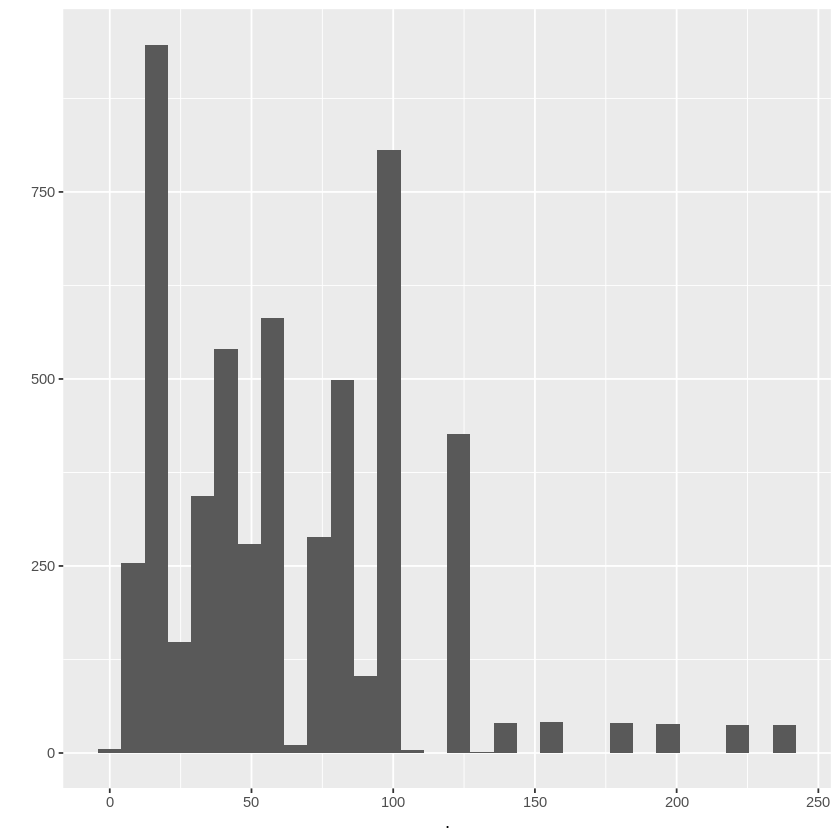

In [ ]:
HISOC_dbase_dt$depth_lower_cm %>% unique

HISOC_dbase_dt$depth_lower_cm %>% qplot

In [ ]:
depth_counts <- table(HISOC_dbase_dt$depth_lower_cm < 15, HISOC_dbase_dt$depth_lower_cm < 20)

print(depth_counts)

       
        FALSE TRUE
  FALSE  4835  361
  TRUE      0  278


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 20 rows containing non-finite outside the scale range (`stat_bin()`).”


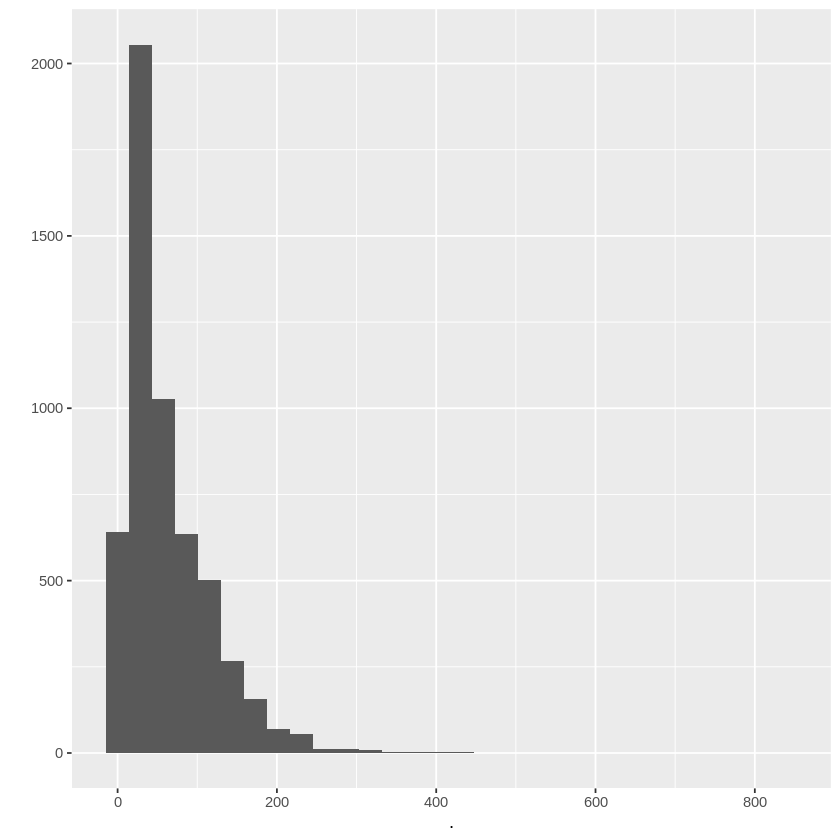

In [ ]:
HISOC_dbase_dt$tc_mg_c_ha_ %>% qplot

In [ ]:
colnames(FIA_dt) <- tolower(colnames(FIA_dt))
names(FIA_dt)

FIA_dt$layer_type %>% unique

[1] "plot"                           "invyr"                         
  [3] "cn_loc"                         "statecd_loc"                   
  [5] "countycd_loc"                   "subp_loc"                      
  [7] "inv_vst_nbr_loc"                "plt_cn_loc"                    
  [9] "cycle_loc"                      "condid"                        
 [11] "created_by"                     "created_date"                  
 [13] "created_in_instance"            "modified_by"                   
 [15] "modified_date"                  "modified_in_instance"          
 [17] "notes"                          "notes_office_loc"              
 [19] "soils_sample_method_cd"         "soils_sample_status_cd"        
 [21] "unitcd"                         "used_in_estimation_cd"         
 [23] "vstnbr_loc"                     "cn_lyr"                        
 [25] "statecd_lyr"                    "countycd_lyr"                  
 [27] "subp_lyr"                       "inv_vst_nbr_lyr"               
 [29] "plt_cn_lyr"                     "cycle_lyr"                     
 [31] "subcycle_lyr"                   "bulk_density"                  
 [33] "bulk_density_fines"             "c_inorg_pct"                   
 [35] "c_mg_ac"                        "c_total_pct"                   
 [37] "coarse_fraction_pct"            "field_sample_lbl"              
 [39] "layer_collected_cd"             "layer_thickness"               
 [41] "layer_type"                     "n_mg_ac"                       
 [43] "n_total_pct"                    "sample_dia"                    
 [45] "sampler_type"                   "soil_samp_per_ac"              
 [47] "sssl_cn"                        "vstnbr_lyr"                    
 [49] "wt_field_moist"                 "wt_oven_dry"                   
 [51] "wt_rock"                        "cn"                            
 [53] "srv_cn"                         "cty_cn"                        
 [55] "measyear"                       "statecd"                       
 [57] "countycd"                       "island_grp"                    
 [59] "county.name"                    "unitcd_plot"                   
 [61] "plot_status_cd"                 "congcd"                        
 [63] "declination"                    "designcd"                      
 [65] "ecosubcd"                       "elev"                          
 [67] "intensity"                      "invasive_sampling_status_cd"   
 [69] "invasive_specimen_rule_cd"      "kindcd"                        
 [71] "lat"                            "lon"                           
 [73] "manual"                         "measmon"                       
 [75] "measday"                        "microplot_loc"                 
 [77] "nf_sampling_status_cd"          "p2veg_sampling_status_cd"      
 [79] "p2veg_sampling_level_detail_cd" "precipitation"                 
 [81] "qa_status"                      "rddistcd"                      
 [83] "samp_method_cd"                 "subp_examine_cd"               
 [85] "watercd"                        "cycle"                         
 [87] "subcycle"                       "p2panel"                       
 [89] "subpanel"                       "prev_plt_cn"                   
 [91] "island"                         "rgn_flg"                       
 [93] "notes_plot"                     "notes_office"                  
 [95] "geographic_area"                "topo_position_pnw"             
 [97] "remper"                         "nbp_cn"                        
 [99] "conservation_zone"              "sum_c_total_pct"               
[101] "notes_flag"                     "soc_mg_ac"                     
[103] "soc_mg_ha"                      "sum_soc_mg_ha"                 
[105] "proportion_c_stock"             "plot_hole_id"                  
[107] "soil_column_id"

[1] "MINERAL_SOIL_0_20_CM"   "MINERAL_SOIL_20_40_CM"  "MINERAL_SOIL_40_60_CM" 
[4] "MINERAL_SOIL_60_80_CM"  "MINERAL_SOIL_80_100_CM"

In [ ]:
#FIA_dt$soc_mg_ha %>% qplot

FIA_dt[, c("depth_top", "depth_bottom") := tstrsplit(str_extract(layer_type, "\\d+_\\d+"), "_")]
FIA_dt[, c("depth_top", "depth_bottom") := lapply(.SD, as.numeric), .SDcols = c("depth_top", "depth_bottom")]

In [ ]:
FIA_dt$depth_top %>% unique
FIA_dt$depth_bottom %>% unique

[1]  0 20 40 60 80

[1]  20  40  60  80 100

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


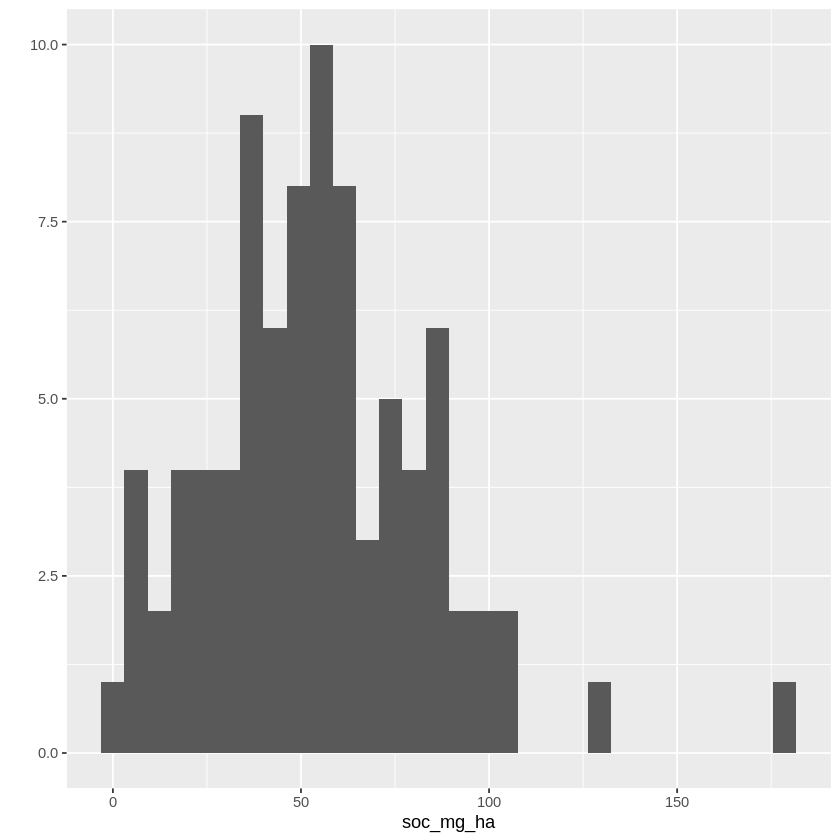

In [ ]:
 subset_data <- FIA_dt[depth_bottom == '20']

 qplot(data = subset_data, x = soc_mg_ha)

In [ ]:
FIA_dt[, unique_id := .I]

FIA_dt[, unique_id := paste0("FIA", unique_id)]

In [ ]:
FIA_dt[, c("latitude", "longitude") := .(lat, lon)][, c("lat", "lon") := NULL]

In [ ]:
names(FIA_dt)

[1] "plot"                           "invyr"                         
  [3] "cn_loc"                         "statecd_loc"                   
  [5] "countycd_loc"                   "subp_loc"                      
  [7] "inv_vst_nbr_loc"                "plt_cn_loc"                    
  [9] "cycle_loc"                      "condid"                        
 [11] "created_by"                     "created_date"                  
 [13] "created_in_instance"            "modified_by"                   
 [15] "modified_date"                  "modified_in_instance"          
 [17] "notes"                          "notes_office_loc"              
 [19] "soils_sample_method_cd"         "soils_sample_status_cd"        
 [21] "unitcd"                         "used_in_estimation_cd"         
 [23] "vstnbr_loc"                     "cn_lyr"                        
 [25] "statecd_lyr"                    "countycd_lyr"                  
 [27] "subp_lyr"                       "inv_vst_nbr_lyr"               
 [29] "plt_cn_lyr"                     "cycle_lyr"                     
 [31] "subcycle_lyr"                   "bulk_density"                  
 [33] "bulk_density_fines"             "c_inorg_pct"                   
 [35] "c_mg_ac"                        "c_total_pct"                   
 [37] "coarse_fraction_pct"            "field_sample_lbl"              
 [39] "layer_collected_cd"             "layer_thickness"               
 [41] "layer_type"                     "n_mg_ac"                       
 [43] "n_total_pct"                    "sample_dia"                    
 [45] "sampler_type"                   "soil_samp_per_ac"              
 [47] "sssl_cn"                        "vstnbr_lyr"                    
 [49] "wt_field_moist"                 "wt_oven_dry"                   
 [51] "wt_rock"                        "cn"                            
 [53] "srv_cn"                         "cty_cn"                        
 [55] "measyear"                       "statecd"                       
 [57] "countycd"                       "island_grp"                    
 [59] "county.name"                    "unitcd_plot"                   
 [61] "plot_status_cd"                 "congcd"                        
 [63] "declination"                    "designcd"                      
 [65] "ecosubcd"                       "elev"                          
 [67] "intensity"                      "invasive_sampling_status_cd"   
 [69] "invasive_specimen_rule_cd"      "kindcd"                        
 [71] "manual"                         "measmon"                       
 [73] "measday"                        "microplot_loc"                 
 [75] "nf_sampling_status_cd"          "p2veg_sampling_status_cd"      
 [77] "p2veg_sampling_level_detail_cd" "precipitation"                 
 [79] "qa_status"                      "rddistcd"                      
 [81] "samp_method_cd"                 "subp_examine_cd"               
 [83] "watercd"                        "cycle"                         
 [85] "subcycle"                       "p2panel"                       
 [87] "subpanel"                       "prev_plt_cn"                   
 [89] "island"                         "rgn_flg"                       
 [91] "notes_plot"                     "notes_office"                  
 [93] "geographic_area"                "topo_position_pnw"             
 [95] "remper"                         "nbp_cn"                        
 [97] "conservation_zone"              "sum_c_total_pct"               
 [99] "notes_flag"                     "soc_mg_ac"                     
[101] "soc_mg_ha"                      "sum_soc_mg_ha"                 
[103] "proportion_c_stock"             "plot_hole_id"                  
[105] "soil_column_id"                 "depth_top"                     
[107] "depth_bottom"                   "unique_id"                     
[109] "latitude"                       "longitude"

In [ ]:
names(SH_master_dt)

[1] "number"                                    
 [2] "site_name"                                 
 [3] "site_number"                               
 [4] "plot_name"                                 
 [5] "plot_area"                                 
 [6] "depth_top "                                
 [7] "depth_bottom "                             
 [8] "soil_column_id"                            
 [9] "replicate"                                 
[10] "latitude"                                  
[11] "longitude"                                 
[12] "primary_project"                           
[13] "secondary_project"                         
[14] "tertiary project"                          
[15] "land_ownership"                            
[16] "old_sh_1"                                  
[17] "sh_1"                                      
[18] "barcode"                                   
[19] "date_sampled"                              
[20] "island"                                    
[21] "current_land_use"                          
[22] "years_under_current_land_use"              
[23] "most_previous_land_use"                    
[24] "years_under_most_previous _land_use"       
[25] "additional_previous _land_use "            
[26] "years_under_additional_previous _land_use" 
[27] "additional_previous_land_use_2"            
[28] "years_under_additional_previous_land_use_2"
[29] "additional_previous_land_use_3"            
[30] "years_under_additional_previous_land_use_3"
[31] "current_plant_cover"                       
[32] "previous_crop_cover"                       
[33] "tillage"                                   
[34] "tillage_frequency"                         
[35] "herbicide"                                 
[36] "pesticide"                                 
[37] "irrigation_type"                           
[38] "additional_soil_cover"                     
[39] "soil_series"                               
[40] "management_category"                       
[41] "pial_none"                                 
[42] "distlevel"                                 
[43] "order"                                     
[44] "minerals"                                  
[45] "swc_fm"                                    
[46] "swc_ad"                                    
[47] "toc"                                       
[48] "tn"                                        
[49] "co2_burst"                                 
[50] "beta_glucosidase"                          
[51] "beta_glucosaminidase"                      
[52] "pnm_init"                                  
[53] "pmn_fin"                                   
[54] "ph"                                        
[55] "doc"                                       
[56] "tdn"                                       
[57] "din"                                       
[58] "don"                                       
[59] "hwec"                                      
[60] "hwen"                                      
[61] "whc"                                       
[62] "wsa_mega"                                  
[63] "wsa_macro"                                 
[64] "bd"                                        
[65] "shs"                                       
[66] "assessment"                                
[67] "c_n"                                       
[68] "doc_don"                                   
[69] "pmn"                                       
[70] "status"                                    
[71] "hyperlinks"                                
[72] "last updated"                              
[73] "unique_id"

In [ ]:
names(HISOC_dbase_dt)

[1] "pubid"                               
 [2] "dataid"                              
 [3] "date_sampled"                        
 [4] "island"                              
 [5] "location"                            
 [6] "latitude"                            
 [7] "longitude"                           
 [8] "land_use"                            
 [9] "soil_cover"                          
[10] "soil_order"                          
[11] "soil_series"                         
[12] "soil_taxonomy"                       
[13] "group_by_id"                         
[14] "depth_upper_cm"                      
[15] "depth_lower_cm"                      
[16] "soil_depth_m_"                       
[17] "x_c"                                 
[18] "x_c_1"                               
[19] "c_perc"                              
[20] "tc_mg_c_ha_"                         
[21] "bulk_density_g_cm3_or_mg_m3_or_kg_l_"
[22] "c_n"                                 
[23] "soil_ph"                             
[24] "x_n"                                 
[25] "tn_mg_ha_"                           
[26] "p_kg_ha_"                            
[27] "elevation_m_"                        
[28] "mat_c_"                              
[29] "map_mm_"                             
[30] "soil_sampling"                       
[31] "previous_land_use"                   
[32] "previous_plant_cover"                
[33] "fertilizer_type"                     
[34] "fertilizer_rate_not_required_"       
[35] "tillage_type"                        
[36] "tillage_frequency"                   
[37] "herbicide"                           
[38] "pesticide"                           
[39] "irrigation_type"                     
[40] "additional_soil_cover"               
[41] "soil_column_id"

In [ ]:
HISOC_dbase_dt[, unique_id := .I]

HISOC_dbase_dt[, unique_id := paste0("HISOC", unique_id)]

In [ ]:
HISOC_dbase_dt[, c("depth_top", "depth_bottom") := .(depth_upper_cm, depth_lower_cm)][, c("depth_upper_cm", "depth_lower_cm") := NULL]

In [ ]:
all(HISOC_dbase_dt$longitude < 0)

HISOC_dbase_dt[, longitude := -abs(longitude)]

all(HISOC_dbase_dt$longitude < 0)

[1] FALSE

[1] TRUE

In [ ]:
HISOC_dbase_dt[is.na(longitude) | longitude == "" | is.na(latitude) | latitude == "", .(unique_id, depth_top, depth_bottom)]

unique_id,depth_top,depth_bottom
<chr>,<int>,<dbl>


In [ ]:
head(FIA_dt)

plot,invyr,cn_loc,statecd_loc,countycd_loc,subp_loc,inv_vst_nbr_loc,plt_cn_loc,cycle_loc,condid,⋯,soc_mg_ha,sum_soc_mg_ha,proportion_c_stock,plot_hole_id,soil_column_id,depth_top,depth_bottom,unique_id,latitude,longitude
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,86.66884,298.8214,0.2900356,FIA_1060,FIA_1060,0,20,FIA1,22.18564,-159.3508
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,83.44473,298.8214,0.2792462,FIA_1060,FIA_1060,20,40,FIA2,22.18564,-159.3508
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,49.62441,298.8214,0.1660671,FIA_1060,FIA_1060,40,60,FIA3,22.18564,-159.3508
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,44.56532,298.8214,0.1491370,FIA_1060,FIA_1060,60,80,FIA4,22.18564,-159.3508
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,34.51811,298.8214,0.1155142,FIA_1060,FIA_1060,80,100,FIA5,22.18564,-159.3508
1076,2019,1.219123e+15,15,7,2,1,4.975537e+14,3,1,⋯,83.20364,325.0640,0.2559608,FIA_1076,FIA_1076,0,20,FIA6,22.13948,-159.6559


In [ ]:
names(HISOC_dbase_dt)

[1] "pubid"                               
 [2] "dataid"                              
 [3] "date_sampled"                        
 [4] "island"                              
 [5] "location"                            
 [6] "latitude"                            
 [7] "longitude"                           
 [8] "land_use"                            
 [9] "soil_cover"                          
[10] "soil_order"                          
[11] "soil_series"                         
[12] "soil_taxonomy"                       
[13] "group_by_id"                         
[14] "soil_depth_m_"                       
[15] "x_c"                                 
[16] "x_c_1"                               
[17] "c_perc"                              
[18] "tc_mg_c_ha_"                         
[19] "bulk_density_g_cm3_or_mg_m3_or_kg_l_"
[20] "c_n"                                 
[21] "soil_ph"                             
[22] "x_n"                                 
[23] "tn_mg_ha_"                           
[24] "p_kg_ha_"                            
[25] "elevation_m_"                        
[26] "mat_c_"                              
[27] "map_mm_"                             
[28] "soil_sampling"                       
[29] "previous_land_use"                   
[30] "previous_plant_cover"                
[31] "fertilizer_type"                     
[32] "fertilizer_rate_not_required_"       
[33] "tillage_type"                        
[34] "tillage_frequency"                   
[35] "herbicide"                           
[36] "pesticide"                           
[37] "irrigation_type"                     
[38] "additional_soil_cover"               
[39] "soil_column_id"                      
[40] "unique_id"                           
[41] "depth_top"                           
[42] "depth_bottom"

In [ ]:
setnames(HISOC_dbase_dt, old = c("bulk_density_g_cm3_or_mg_m3_or_kg_l_"), new = c("bulk_density"))

In [ ]:
setnames(SH_master_dt, old = c("bd"), new = c("bulk_density"))

In [ ]:
names(SH_master_dt)

# setnames(SH_master_dt, old = c("toc"), new = c("c_perc"))
setnames(SH_master_dt, old = c('depth_bottom '), new = c("depth_bottom"))
setnames(SH_master_dt, old = c('depth_top '), new = c("depth_top"))

[1] "number"                                    
 [2] "site_name"                                 
 [3] "site_number"                               
 [4] "plot_name"                                 
 [5] "plot_area"                                 
 [6] "depth_top "                                
 [7] "depth_bottom "                             
 [8] "soil_column_id"                            
 [9] "replicate"                                 
[10] "latitude"                                  
[11] "longitude"                                 
[12] "primary_project"                           
[13] "secondary_project"                         
[14] "tertiary project"                          
[15] "land_ownership"                            
[16] "old_sh_1"                                  
[17] "sh_1"                                      
[18] "barcode"                                   
[19] "date_sampled"                              
[20] "island"                                    
[21] "current_land_use"                          
[22] "years_under_current_land_use"              
[23] "most_previous_land_use"                    
[24] "years_under_most_previous _land_use"       
[25] "additional_previous _land_use "            
[26] "years_under_additional_previous _land_use" 
[27] "additional_previous_land_use_2"            
[28] "years_under_additional_previous_land_use_2"
[29] "additional_previous_land_use_3"            
[30] "years_under_additional_previous_land_use_3"
[31] "current_plant_cover"                       
[32] "previous_crop_cover"                       
[33] "tillage"                                   
[34] "tillage_frequency"                         
[35] "herbicide"                                 
[36] "pesticide"                                 
[37] "irrigation_type"                           
[38] "additional_soil_cover"                     
[39] "soil_series"                               
[40] "management_category"                       
[41] "pial_none"                                 
[42] "distlevel"                                 
[43] "order"                                     
[44] "minerals"                                  
[45] "swc_fm"                                    
[46] "swc_ad"                                    
[47] "toc"                                       
[48] "tn"                                        
[49] "co2_burst"                                 
[50] "beta_glucosidase"                          
[51] "beta_glucosaminidase"                      
[52] "pnm_init"                                  
[53] "pmn_fin"                                   
[54] "ph"                                        
[55] "doc"                                       
[56] "tdn"                                       
[57] "din"                                       
[58] "don"                                       
[59] "hwec"                                      
[60] "hwen"                                      
[61] "whc"                                       
[62] "wsa_mega"                                  
[63] "wsa_macro"                                 
[64] "bulk_density"                              
[65] "shs"                                       
[66] "assessment"                                
[67] "c_n"                                       
[68] "doc_don"                                   
[69] "pmn"                                       
[70] "status"                                    
[71] "hyperlinks"                                
[72] "last updated"                              
[73] "unique_id"

In [ ]:
names(FIA_dt)

setnames(FIA_dt, old = c("c_total_pct"), new = c("c_perc"))

[1] "plot"                           "invyr"                         
  [3] "cn_loc"                         "statecd_loc"                   
  [5] "countycd_loc"                   "subp_loc"                      
  [7] "inv_vst_nbr_loc"                "plt_cn_loc"                    
  [9] "cycle_loc"                      "condid"                        
 [11] "created_by"                     "created_date"                  
 [13] "created_in_instance"            "modified_by"                   
 [15] "modified_date"                  "modified_in_instance"          
 [17] "notes"                          "notes_office_loc"              
 [19] "soils_sample_method_cd"         "soils_sample_status_cd"        
 [21] "unitcd"                         "used_in_estimation_cd"         
 [23] "vstnbr_loc"                     "cn_lyr"                        
 [25] "statecd_lyr"                    "countycd_lyr"                  
 [27] "subp_lyr"                       "inv_vst_nbr_lyr"               
 [29] "plt_cn_lyr"                     "cycle_lyr"                     
 [31] "subcycle_lyr"                   "bulk_density"                  
 [33] "bulk_density_fines"             "c_inorg_pct"                   
 [35] "c_mg_ac"                        "c_total_pct"                   
 [37] "coarse_fraction_pct"            "field_sample_lbl"              
 [39] "layer_collected_cd"             "layer_thickness"               
 [41] "layer_type"                     "n_mg_ac"                       
 [43] "n_total_pct"                    "sample_dia"                    
 [45] "sampler_type"                   "soil_samp_per_ac"              
 [47] "sssl_cn"                        "vstnbr_lyr"                    
 [49] "wt_field_moist"                 "wt_oven_dry"                   
 [51] "wt_rock"                        "cn"                            
 [53] "srv_cn"                         "cty_cn"                        
 [55] "measyear"                       "statecd"                       
 [57] "countycd"                       "island_grp"                    
 [59] "county.name"                    "unitcd_plot"                   
 [61] "plot_status_cd"                 "congcd"                        
 [63] "declination"                    "designcd"                      
 [65] "ecosubcd"                       "elev"                          
 [67] "intensity"                      "invasive_sampling_status_cd"   
 [69] "invasive_specimen_rule_cd"      "kindcd"                        
 [71] "manual"                         "measmon"                       
 [73] "measday"                        "microplot_loc"                 
 [75] "nf_sampling_status_cd"          "p2veg_sampling_status_cd"      
 [77] "p2veg_sampling_level_detail_cd" "precipitation"                 
 [79] "qa_status"                      "rddistcd"                      
 [81] "samp_method_cd"                 "subp_examine_cd"               
 [83] "watercd"                        "cycle"                         
 [85] "subcycle"                       "p2panel"                       
 [87] "subpanel"                       "prev_plt_cn"                   
 [89] "island"                         "rgn_flg"                       
 [91] "notes_plot"                     "notes_office"                  
 [93] "geographic_area"                "topo_position_pnw"             
 [95] "remper"                         "nbp_cn"                        
 [97] "conservation_zone"              "sum_c_total_pct"               
 [99] "notes_flag"                     "soc_mg_ac"                     
[101] "soc_mg_ha"                      "sum_soc_mg_ha"                 
[103] "proportion_c_stock"             "plot_hole_id"                  
[105] "soil_column_id"                 "depth_top"                     
[107] "depth_bottom"                   "unique_id"                     
[109] "latitude"                       "longitude"

In [ ]:
names(HISOC_dbase_dt)



[1] "pubid"                         "dataid"                       
 [3] "date_sampled"                  "island"                       
 [5] "location"                      "latitude"                     
 [7] "longitude"                     "land_use"                     
 [9] "soil_cover"                    "soil_order"                   
[11] "soil_series"                   "soil_taxonomy"                
[13] "group_by_id"                   "soil_depth_m_"                
[15] "x_c"                           "x_c_1"                        
[17] "c_perc"                        "tc_mg_c_ha_"                  
[19] "bulk_density"                  "c_n"                          
[21] "soil_ph"                       "x_n"                          
[23] "tn_mg_ha_"                     "p_kg_ha_"                     
[25] "elevation_m_"                  "mat_c_"                       
[27] "map_mm_"                       "soil_sampling"                
[29] "previous_land_use"             "previous_plant_cover"         
[31] "fertilizer_type"               "fertilizer_rate_not_required_"
[33] "tillage_type"                  "tillage_frequency"            
[35] "herbicide"                     "pesticide"                    
[37] "irrigation_type"               "additional_soil_cover"        
[39] "soil_column_id"                "unique_id"                    
[41] "depth_top"                     "depth_bottom"

In [ ]:
combined_dt <- rbindlist(list(SH_master_dt, HISOC_dbase_dt, FIA_dt), use.names = TRUE, fill = TRUE)

combine all three datasets

In [ ]:
names(combined_dt)

[1] "number"                                    
  [2] "site_name"                                 
  [3] "site_number"                               
  [4] "plot_name"                                 
  [5] "plot_area"                                 
  [6] "depth_top"                                 
  [7] "depth_bottom"                              
  [8] "soil_column_id"                            
  [9] "replicate"                                 
 [10] "latitude"                                  
 [11] "longitude"                                 
 [12] "primary_project"                           
 [13] "secondary_project"                         
 [14] "tertiary project"                          
 [15] "land_ownership"                            
 [16] "old_sh_1"                                  
 [17] "sh_1"                                      
 [18] "barcode"                                   
 [19] "date_sampled"                              
 [20] "island"                                    
 [21] "current_land_use"                          
 [22] "years_under_current_land_use"              
 [23] "most_previous_land_use"                    
 [24] "years_under_most_previous _land_use"       
 [25] "additional_previous _land_use "            
 [26] "years_under_additional_previous _land_use" 
 [27] "additional_previous_land_use_2"            
 [28] "years_under_additional_previous_land_use_2"
 [29] "additional_previous_land_use_3"            
 [30] "years_under_additional_previous_land_use_3"
 [31] "current_plant_cover"                       
 [32] "previous_crop_cover"                       
 [33] "tillage"                                   
 [34] "tillage_frequency"                         
 [35] "herbicide"                                 
 [36] "pesticide"                                 
 [37] "irrigation_type"                           
 [38] "additional_soil_cover"                     
 [39] "soil_series"                               
 [40] "management_category"                       
 [41] "pial_none"                                 
 [42] "distlevel"                                 
 [43] "order"                                     
 [44] "minerals"                                  
 [45] "swc_fm"                                    
 [46] "swc_ad"                                    
 [47] "toc"                                       
 [48] "tn"                                        
 [49] "co2_burst"                                 
 [50] "beta_glucosidase"                          
 [51] "beta_glucosaminidase"                      
 [52] "pnm_init"                                  
 [53] "pmn_fin"                                   
 [54] "ph"                                        
 [55] "doc"                                       
 [56] "tdn"                                       
 [57] "din"                                       
 [58] "don"                                       
 [59] "hwec"                                      
 [60] "hwen"                                      
 [61] "whc"                                       
 [62] "wsa_mega"                                  
 [63] "wsa_macro"                                 
 [64] "bulk_density"                              
 [65] "shs"                                       
 [66] "assessment"                                
 [67] "c_n"                                       
 [68] "doc_don"                                   
 [69] "pmn"                                       
 [70] "status"                                    
 [71] "hyperlinks"                                
 [72] "last updated"                              
 [73] "unique_id"                                 
 [74] "pubid"                                     
 [75] "dataid"                                    
 [76] "location"                                  
 [77] "land_use"                                  
 [78] "soil_cover"                                
 [79] "soil_order"      

plot c percent vs. bulk density for each depth set, then group into logical groupings to use mean or distribution of bulk density values for the rest of the C values that don't have them

In [ ]:
range(combined_dt$bulk_density, na.rm = TRUE)
range(combined_dt$c_perc, na.rm = TRUE)

[1] ""      "2.215"

[1]  0.06 72.00

In [ ]:
combined_dt[, bulk_density := as.numeric(bulk_density)]

In [ ]:
combined_dt[, c_perc := as.numeric(c_perc)]

In [ ]:
summary(combined_dt$c_perc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.060   0.600   1.200   3.974   5.800  72.000     989 

In [ ]:
sum(combined_dt$c_perc > 40, na.rm = TRUE)

[1] 21

below for just the depths to 15 and 20 cm

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1440 rows containing missing values or values outside the scale range
(`geom_point()`).”


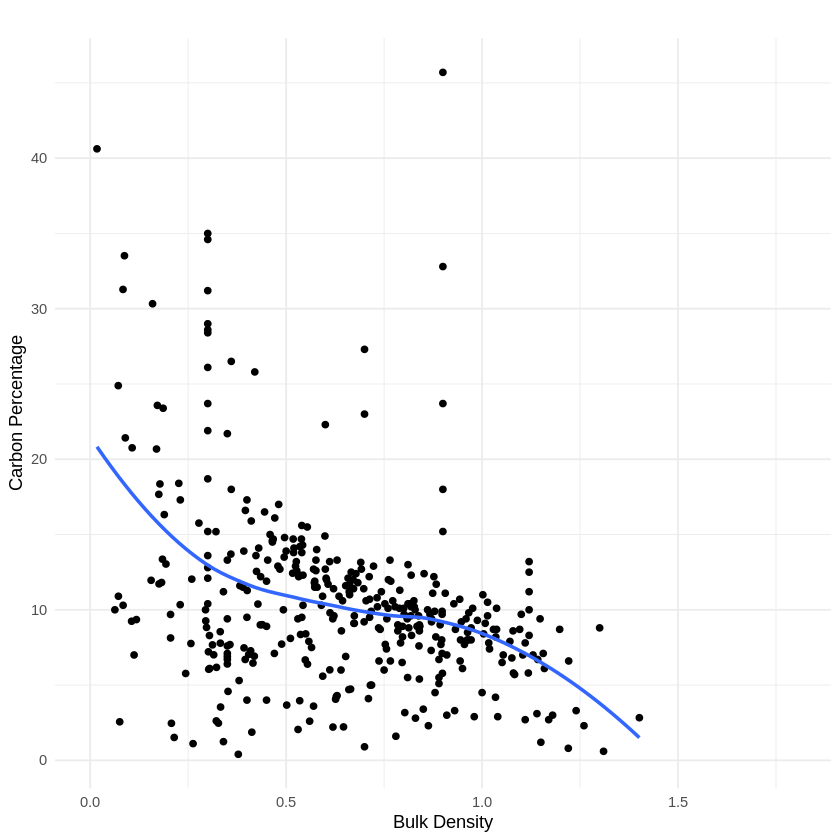

In [ ]:
 subset_data <- combined_dt[depth_bottom %in% c(15, 20),]

ggplot(subset_data, aes(x = bulk_density, y = c_perc, na.rm = TRUE)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE) +
  labs(x = "Bulk Density", y = "Carbon Percentage",
       title = "") +
  theme_minimal()


In [ ]:
# source dataset identifiers
combined_dt[, source_dataset := sub("(\\D+).*", "\\1", unique_id)]


In [ ]:
combined_dt[, source_dataset := factor(source_dataset, levels = c("HISOC", "SH", "FIA"))]

Warning message:
“Removed 989 rows containing non-finite outside the scale range (`stat_bin()`).”


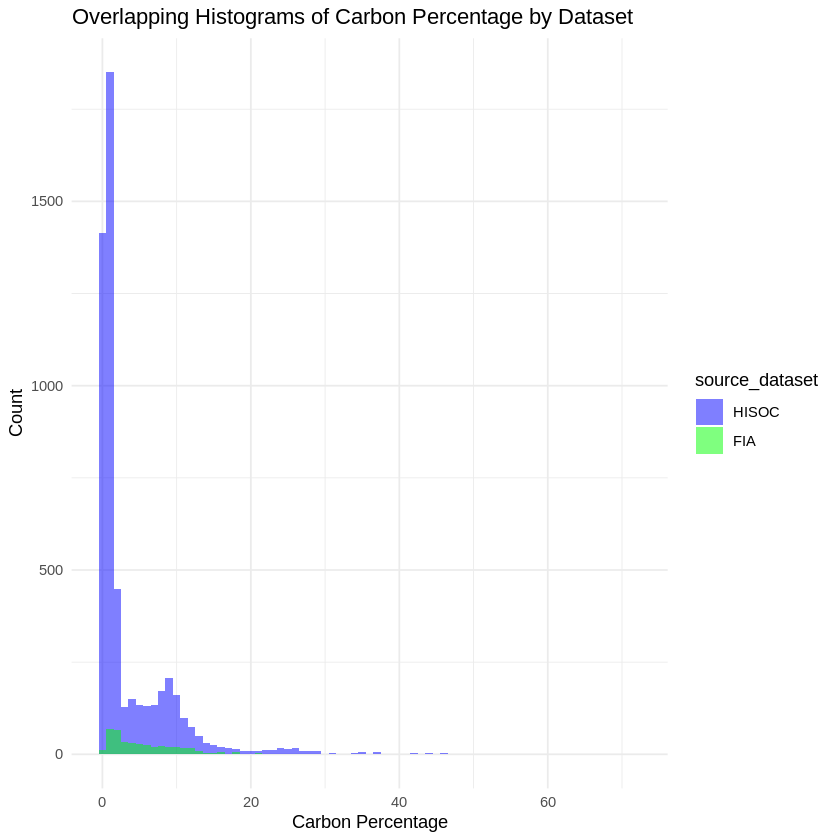

In [ ]:

ggplot(combined_dt, aes(x = c_perc, fill = source_dataset)) +
  geom_histogram(position = "identity", alpha = 0.5, binwidth = 1) +
  labs(x = "Carbon Percentage", y = "Count", title = "Overlapping Histograms of Carbon Percentage by Dataset") +
  theme_minimal() +
  scale_fill_manual(values = c("HISOC" = "blue", "SH" = "red", "FIA" = "green"))

Warning message:
“Removed 931 rows containing non-finite outside the scale range (`stat_bin()`).”


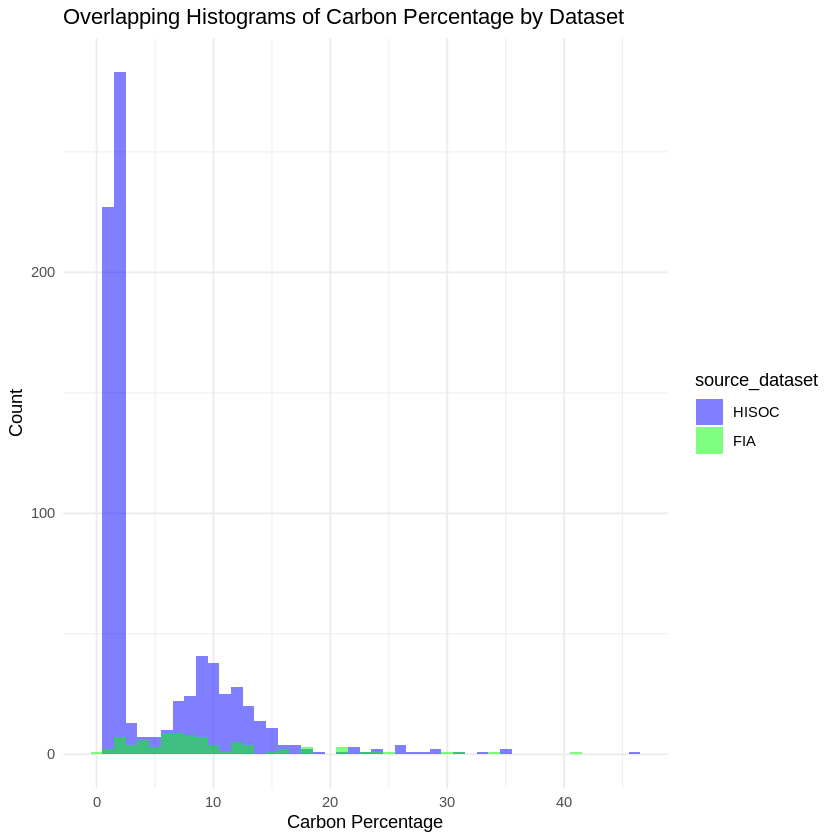

In [ ]:
 combined_dt[, source_dataset := factor(source_dataset, levels = c("HISOC", "SH", "FIA"))]

 subset_data <- combined_dt[depth_bottom %in% c(15, 20),]

 ggplot(subset_data, aes(x = c_perc, fill = source_dataset)) +
  geom_histogram(position = "identity", alpha = 0.5, binwidth = 1) +
  labs(x = "Carbon Percentage", y = "Count", title = "Overlapping Histograms of Carbon Percentage by Dataset") +
  theme_minimal() +
  scale_fill_manual(values = c("HISOC" = "blue", "SH" = "red", "FIA" = "green"))

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1440 rows containing missing values or values outside the scale range
(`geom_point()`).”


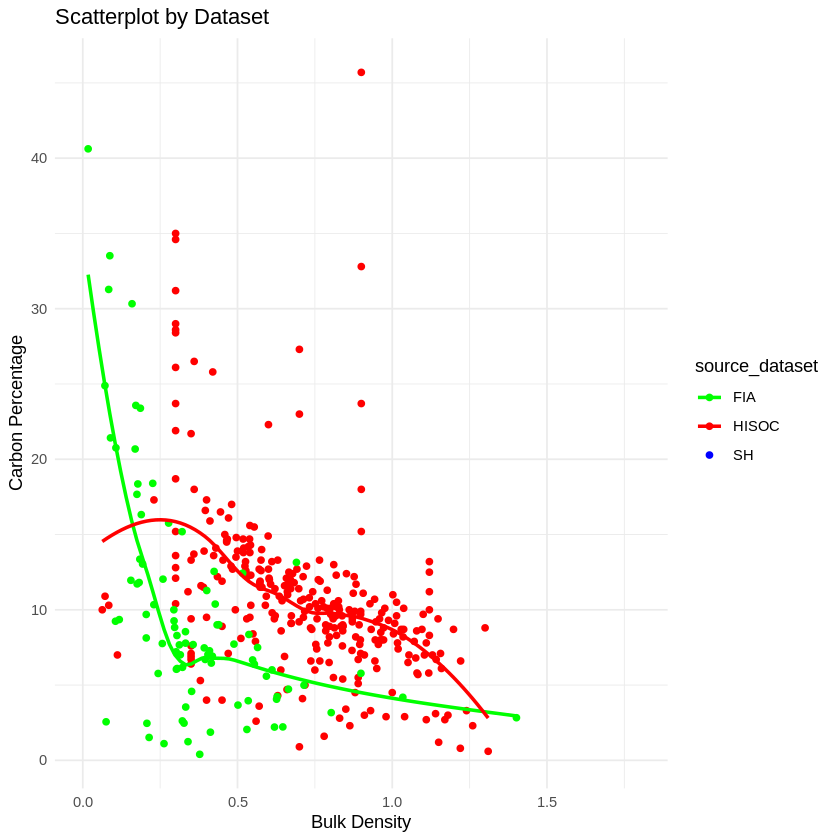

In [ ]:
combined_dt[, source_dataset := factor(source_dataset, levels = c("FIA", "HISOC", "SH"))]

subset_data <- combined_dt[depth_bottom %in% c(15, 20),]

ggplot(subset_data, aes(x = bulk_density, y = c_perc, color = source_dataset)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE, aes(group = source_dataset)) +
  labs(x = "Bulk Density", y = "Carbon Percentage", title = "Scatterplot by Dataset") +
  theme_minimal() +
  scale_color_manual(values = c("HISOC" = "red", "SH" = "blue", "FIA" = "green"))

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4142 rows containing missing values or values outside the scale range
(`geom_point()`).”


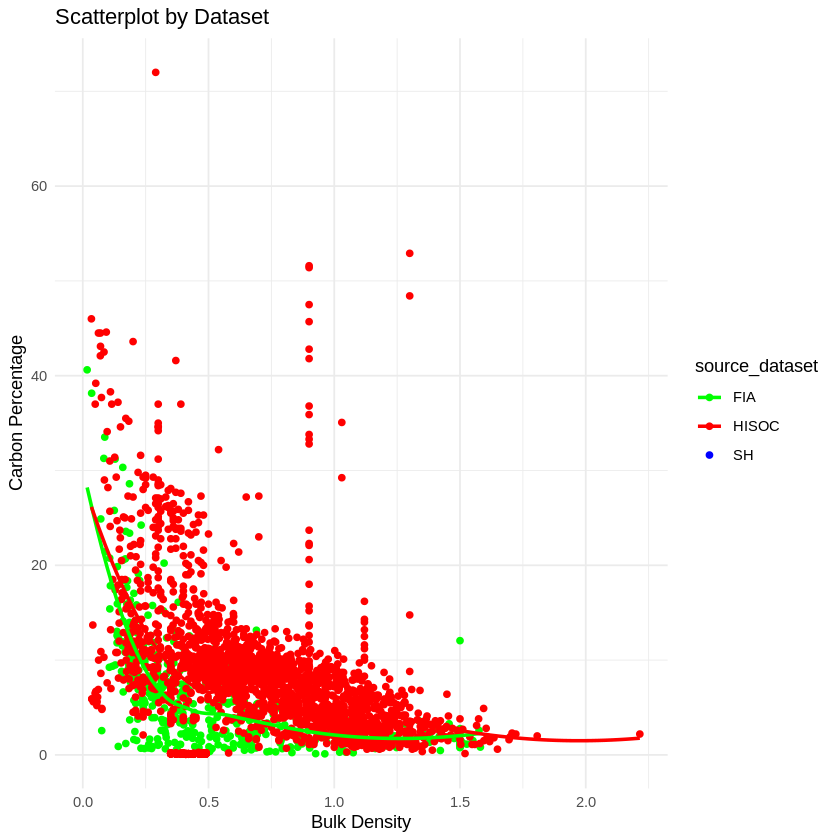

In [ ]:
combined_dt[, source_dataset := factor(source_dataset, levels = c("FIA", "HISOC", "SH"))]

combined_dt <- combined_dt[order(combined_dt$source_dataset), ]

ggplot(combined_dt, aes(x = bulk_density, y = c_perc, color = source_dataset)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE, aes(group = source_dataset)) +
  labs(x = "Bulk Density", y = "Carbon Percentage", title = "Scatterplot by Dataset") +
  theme_minimal() +
  scale_color_manual(values = c("HISOC" = "red", "SH" = "blue", "FIA" = "green"))

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4142 rows containing missing values or values outside the scale range
(`geom_point()`).”


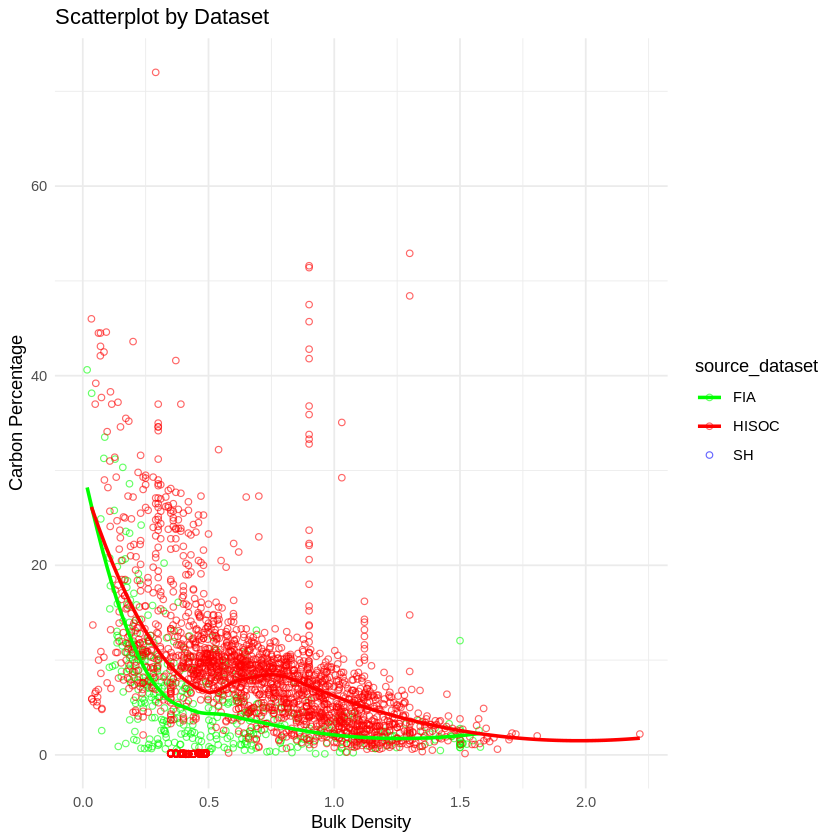

In [ ]:
combined_dt <- combined_dt[order(combined_dt$source_dataset), ]

ggplot(combined_dt, aes(x = bulk_density, y = c_perc, color = source_dataset)) +
  geom_point(shape = 1, alpha = 0.6) +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE, aes(group = source_dataset)) +
  labs(x = "Bulk Density", y = "Carbon Percentage", title = "Scatterplot by Dataset") +
  theme_minimal() +
  scale_color_manual(values = c("HISOC" = "red", "SH" = "blue", "FIA" = "green"))

In [ ]:
# combined_dt[source_dataset == "SH" & bulk_density == 0]

# combined_dt[secondary_project == "Waialua Farms" & depth_top == 0 & depth_bottom == 15]

# combined_dt[source_dataset == "SH" & bulk_density < 0.5, .(source_dataset, bulk_density)]


In [ ]:
combined_dt[secondary_project == "Waialua Farms" & depth_top == 0 & depth_bottom == 15]

# Calculate the mean bulk density for samples with bulk_density > 0
mean_bulk_density <- mean(combined_dt$bulk_density[combined_dt$bulk_density > 0], na.rm = TRUE)

# Fill in bulk_density values that are zero with the mean
combined_dt[, bulk_density := fifelse(bulk_density == 0, mean_bulk_density, bulk_density)]

head(combined_dt)


number,site_name,site_number,plot_name,plot_area,depth_top,depth_bottom,soil_column_id,replicate,latitude,⋯,nbp_cn,conservation_zone,sum_c_total_pct,notes_flag,soc_mg_ac,soc_mg_ha,sum_soc_mg_ha,proportion_c_stock,plot_hole_id,source_dataset
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
837,waialua farmsoahu,150,Plot 1,5,0,15,SH837-01,,21.5437933,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
838,waialua farmsoahu,150,Plot 2,5,0,15,SH838-01,,21.5446532,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
839,waialua farmsoahu,150,Plot 3,5,0,15,SH839-01,,21.5456878,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
840,waialua farmsoahu,150,Plot 4,5,0,15,SH840-01,,21.54489,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
841,waialua farmsoahu,150,Plot 5,5,0,15,SH841-01,,21.5457717,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
842,waialua farmsoahu,150,Plot 6,5,0,15,SH842-01,,21.5465835,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
843,waialua farmsoahu,150,Plot 7,5,0,15,SH843-01,,21.5532464,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
844,waialua farmsoahu,150,Plot 8,5,0,15,SH844-01,,21.5525459,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
845,waialua farmsoahu,150,Plot 9,5,0,15,SH845-01,,21.551162,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH


number,site_name,site_number,plot_name,plot_area,depth_top,depth_bottom,soil_column_id,replicate,latitude,⋯,nbp_cn,conservation_zone,sum_c_total_pct,notes_flag,soc_mg_ac,soc_mg_ha,sum_soc_mg_ha,proportion_c_stock,plot_hole_id,source_dataset
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
NA,NA,NA,NA,NA,0,20,FIA_1060,NA,22.185643,⋯,4.819775e+13,,12.16,,35.07369,86.66884,298.8214,0.2900356,FIA_1060,FIA
NA,NA,NA,NA,NA,20,40,FIA_1060,NA,22.185643,⋯,4.819775e+13,,12.16,,33.76894,83.44473,298.8214,0.2792462,FIA_1060,FIA
NA,NA,NA,NA,NA,40,60,FIA_1060,NA,22.185643,⋯,4.819775e+13,,12.16,,20.08232,49.62441,298.8214,0.1660671,FIA_1060,FIA
NA,NA,NA,NA,NA,60,80,FIA_1060,NA,22.185643,⋯,4.819775e+13,,12.16,,18.03497,44.56532,298.8214,0.1491370,FIA_1060,FIA
NA,NA,NA,NA,NA,80,100,FIA_1060,NA,22.185643,⋯,4.819775e+13,,12.16,,13.96901,34.51811,298.8214,0.1155142,FIA_1060,FIA
NA,NA,NA,NA,NA,0,20,FIA_1076,NA,22.139481,⋯,4.819776e+13,P,32.84,,33.67137,83.20364,325.0640,0.2559608,FIA_1076,FIA


Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”


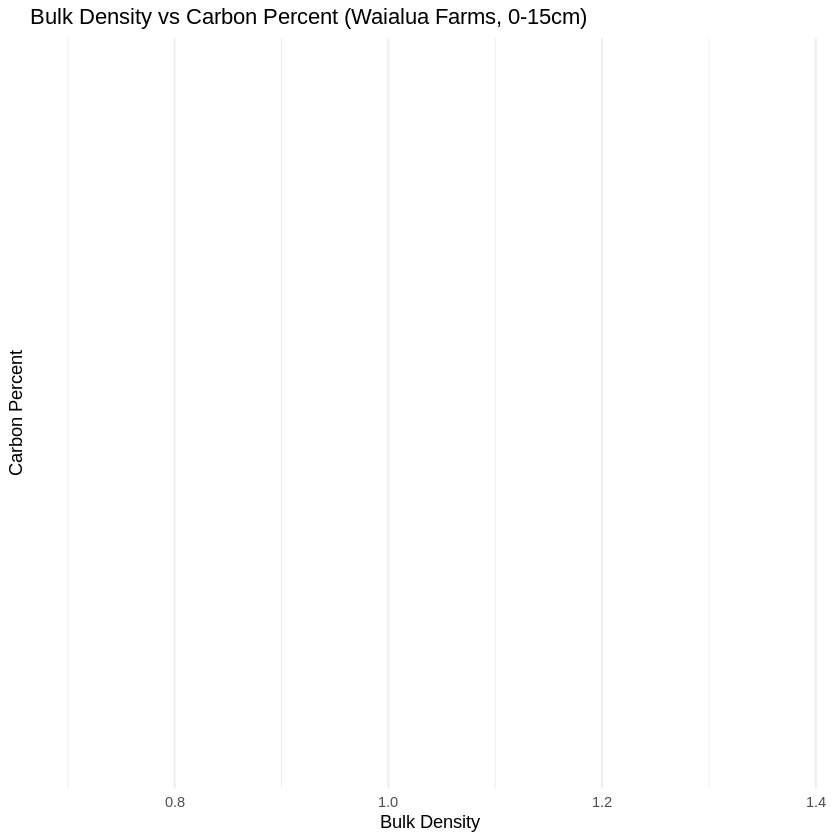

In [ ]:
waialua_subset <- combined_dt[secondary_project == "Waialua Farms" & depth_top == 0 & depth_bottom == 15]

# Create a plot of bulk density by carbon percent
ggplot(waialua_subset, aes(x = bulk_density, y = c_perc)) +
  geom_point() +
  labs(x = "Bulk Density", y = "Carbon Percent", title = "Bulk Density vs Carbon Percent (Waialua Farms, 0-15cm)") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1440 rows containing missing values or values outside the scale range
(`geom_point()`).”


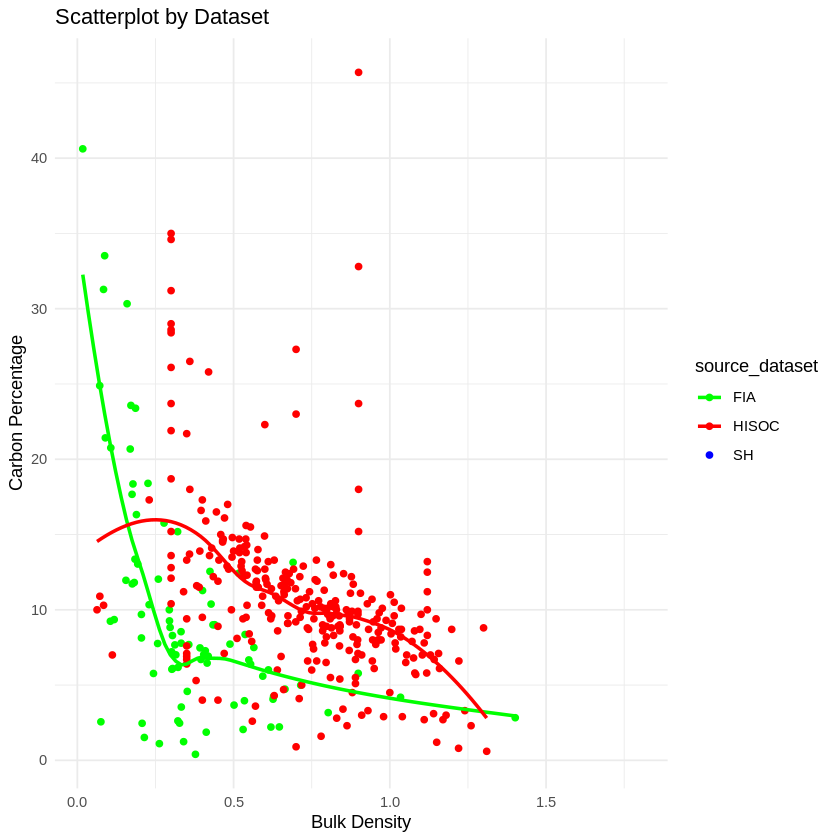

In [ ]:
combined_dt[, source_dataset := factor(source_dataset, levels = c("FIA", "HISOC", "SH"))]

subset_data <- combined_dt[depth_bottom %in% c(15, 20),]

ggplot(subset_data, aes(x = bulk_density, y = c_perc, color = source_dataset)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE, aes(group = source_dataset)) +
  labs(x = "Bulk Density", y = "Carbon Percentage", title = "Scatterplot by Dataset") +
  theme_minimal() +
  scale_color_manual(values = c("HISOC" = "red", "SH" = "blue", "FIA" = "green"))

for HISOC and SH, get mean bulk density to fill in for given data cuts: 0-0.5, 0.5-1, 1-1.5, >1.5, just for 0-15, 0-20 cm deths for now

Warning message:
“Removed 371 rows containing missing values or values outside the scale range
(`geom_point()`).”


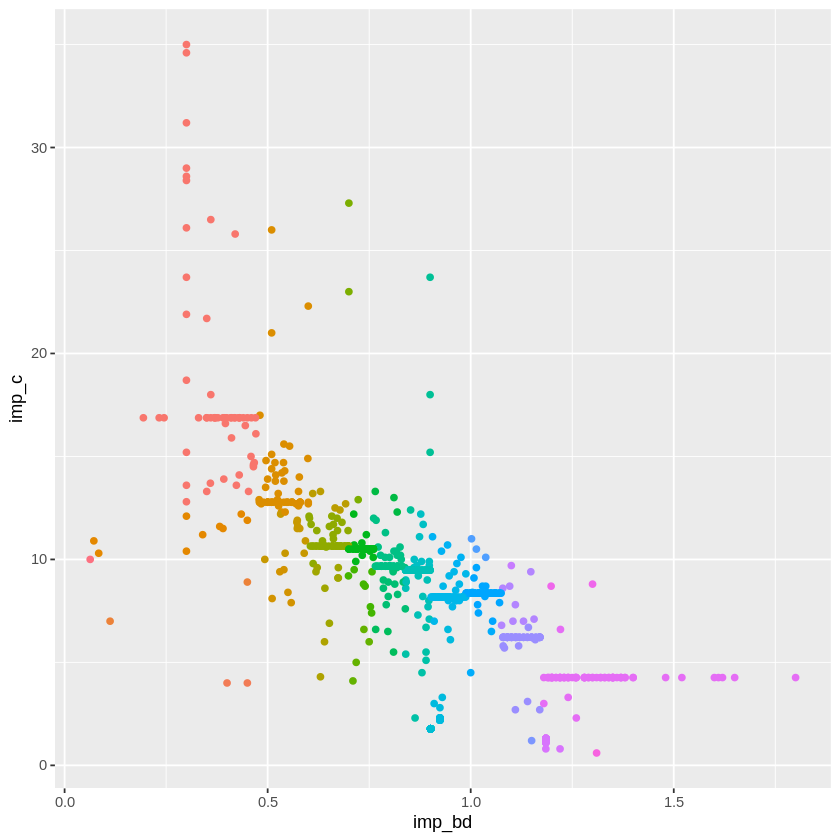

In [ ]:
# Subset data for HISOC and SH datasets and specified depth increments
subset_dt <- combined_dt[source_dataset %in% c("HISOC", "SH") &
                           (depth_top == 0 & depth_bottom %in% c(15, 20)), ]

# Define clusters based on bulk_density
subset_dt[,bd_clusters:=cut(bulk_density, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(c_perc, breaks = quantile(c_perc,seq(0,1,.1),na.rm=T))]


# Calculate mean bulk_density for each cluster and c_perc
subset_dt[, mean_bd := mean(bulk_density, na.rm = TRUE), by = .( c_clusters)]

subset_dt[, mean_c := mean(c_perc, na.rm = TRUE), by = .(bd_clusters)]

subset_dt[, imp_bd := ifelse(!is.na(bulk_density),bulk_density,mean_bd)]

subset_dt[, imp_c := ifelse(!is.na(c_perc),c_perc,mean_c)]


# Define clusters based on bulk_density
subset_dt[,bd_clusters:=cut(imp_bd, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(imp_c, breaks = quantile(c_perc,seq(0,1,.1),na.rm=T))]



subset_dt %>%
  ggplot(aes(x=imp_bd,y=imp_c))+
  geom_point(aes(color = paste(bd_clusters,c_clusters) )) +
  theme(legend.position = "none")



In [ ]:
sort(unique(combined_dt$depth_top))

[1] "0"   "10"  "100" "11"  "12"  "120" "13"  "14"  "140" "15"  "16"  "160"
[13] "17"  "18"  "180" "19"  "2"   "20"  "200" "21"  "22"  "220" "23"  "24" 
[25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "34"  "35"  "36"  "37" 
[37] "38"  "39"  "4"   "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
[49] "5"   "50"  "52"  "54"  "55"  "58"  "6"   "60"  "62"  "66"  "7"   "70" 
[61] "71"  "72"  "75"  "77"  "78"  "8"   "80"  "9"   "90"

In [ ]:
sort(unique(combined_dt$depth_bottom))

[1] "10"   "100"  "105"  "11"   "110"  "12"   "12.5" "120"  "13"   "135" 
[11] "14"   "140"  "15"   "152"  "16"   "160"  "17"   "18"   "180"  "19"  
[21] "2"    "20"   "200"  "21"   "22"   "220"  "23"   "24"   "240"  "25"  
[31] "26"   "27"   "28"   "29"   "30"   "31"   "32"   "34"   "35"   "36"  
[41] "37"   "38"   "39"   "4"    "40"   "41"   "42"   "43"   "44"   "45"  
[51] "46"   "47"   "48"   "5"    "50"   "51"   "52"   "54"   "55"   "56"  
[61] "58"   "59"   "6"    "60"   "61"   "62"   "64"   "65"   "66"   "67"  
[71] "7"    "70"   "71"   "72"   "73"   "75"   "76"   "77"   "78"   "80"  
[81] "81"   "85"   "9"    "90"   "91.5" "92"   "94"   "97"

In [ ]:
sum(is.na(combined_dt[source_dataset %in% c("HISOC") &
                                               (depth_top == 40 & depth_bottom %in% c(60)),
                                               .(bulk_density)]$bulk_density) |
                            combined_dt[source_dataset %in% c("HISOC") &
                                        (depth_top == 40 & depth_bottom %in% c(60)),
                                        .(bulk_density)]$bulk_density == "")

[1] 499

In [ ]:
# combined_dt[source_dataset %in% c("FIA") &
#                                        (depth_top == 20 & depth_bottom %in% c(40)),
#                                               .(bulk_density)]

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”


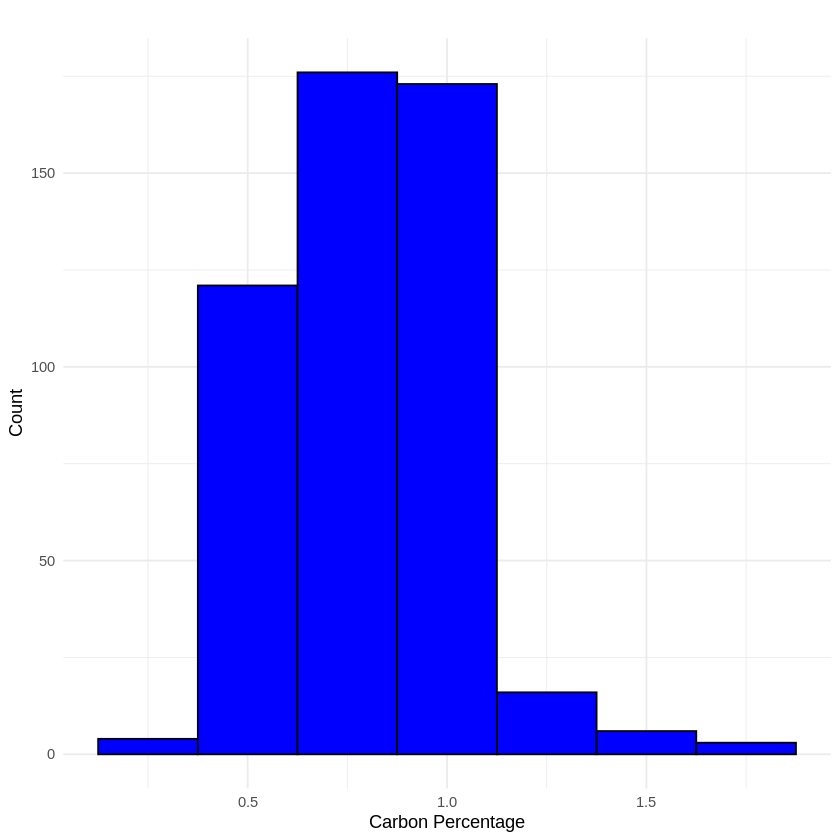

In [ ]:
combined_dt[source_dataset %in% c("HISOC") &
                         (depth_top == 40 & depth_bottom %in% c(60)),
                         .(c_perc, bulk_density)] %>%

ggplot( aes(x = c_perc)) +
  geom_histogram(binwidth = 0.25, fill = "blue", color = "black") +
  labs(x = "Carbon Percentage", y = "Count", title = "") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 500 rows containing missing values or values outside the scale range
(`geom_point()`).”


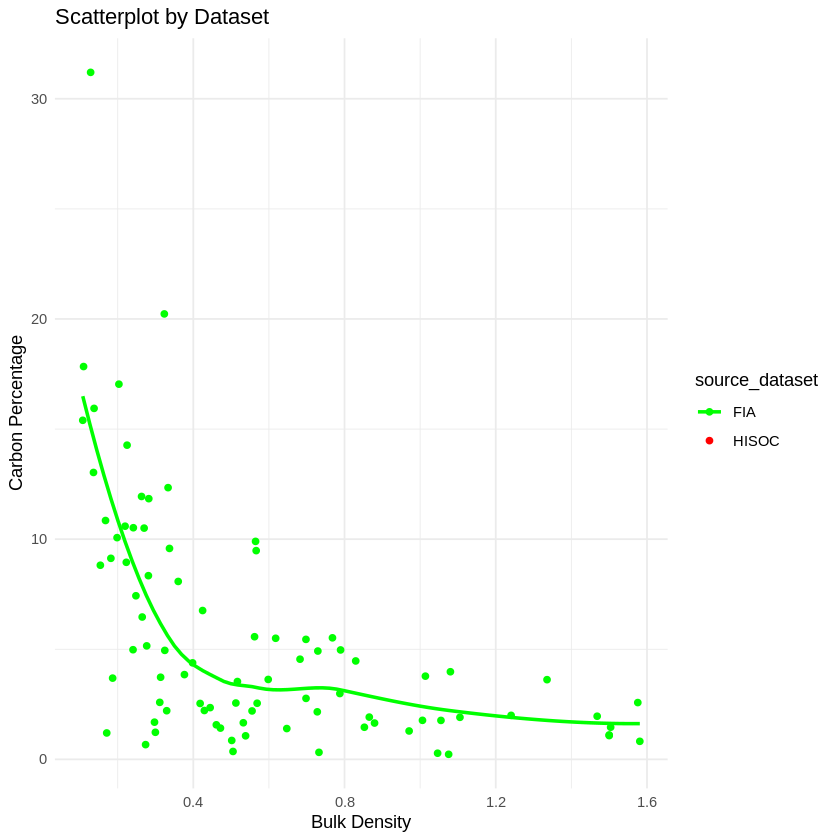

In [ ]:
combined_dt[, source_dataset := factor(source_dataset, levels = c("FIA", "HISOC", "SH"))]

subset_data <- combined_dt[depth_top == 40 & depth_bottom %in% c(60),]

ggplot(subset_data, aes(y = c_perc, x = bulk_density, color = source_dataset)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE, aes(group = source_dataset)) +
  labs(x = "Bulk Density", y = "Carbon Percentage", title = "Scatterplot by Dataset") +
  theme_minimal() +
  scale_color_manual(values = c("HISOC" = "red", "SH" = "blue", "FIA" = "green"))

In [ ]:
subset_dt[source_dataset=="HISOC"]$c_perc %>% table

.
 0.6  0.8  1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9    2  2.1  2.2  2.3  2.7 
   1    2    4   39   68   64   48   81   55   44   34   22   23   12   10    2 
 2.8    3  3.1  3.3    4  4.1  4.3  4.5    5  5.1  5.4  5.5  5.7  5.8    6  6.1 
   1    2    1    2    2    1    1    2    1    1    1    2    1    2    2    2 
 6.5  6.6  6.7  6.8  6.9    7  7.1  7.3  7.4  7.6  7.7  7.8  7.9    8  8.1  8.2 
   2    4    2    1    1    5    2    1    2    1    3    3    2    5    1    3 
 8.3  8.4  8.5  8.6  8.7  8.8  8.9    9  9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8 
   1    2    1    4    6    4    5    3    3    3    1    7    3    6    4    2 
 9.9   10 10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9   11 11.1 11.2 11.3 11.4 
   3    4    5    4    3    5    1    4    2    1    3    2    2    3    1    3 
11.5 11.6 11.7 11.8 11.9   12 12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9   13 
   3    3    3    2    3    3    3    4    3    2    1    2    4    1    3    1 
13.2 13.3 13.5 13.6 13.7 1

Warning message:
“Removed 234 rows containing missing values or values outside the scale range
(`geom_point()`).”


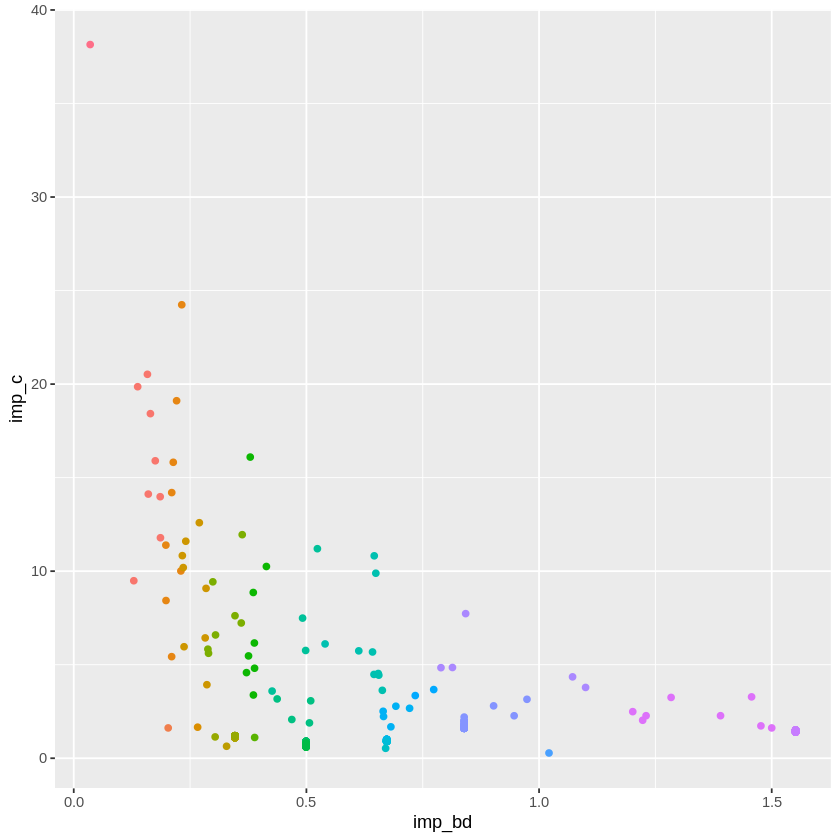

In [ ]:
# Subset data for HISOC and FIA datasets and specified depth increments
subset_dt <- combined_dt[source_dataset %in% c("HISOC", "FIA") &
                           (depth_top == 20 & depth_bottom == 40), ]

# # Define clusters based on bulk_density
subset_dt[,epsilon:=rnorm(nrow(subset_dt))*0.000001]
subset_dt[,bd_clusters:=cut(bulk_density, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(c_perc +epsilon, breaks = quantile(c_perc+epsilon,seq(0,1,.1),na.rm=T))]

# Calculate mean bulk_density for each cluster and c_perc
subset_dt[, mean_bd := mean(bulk_density, na.rm = TRUE), by = .( c_clusters)]

subset_dt[, mean_c := mean(c_perc, na.rm = TRUE), by = .(bd_clusters)]

subset_dt[, imp_bd := ifelse(!is.na(bulk_density),bulk_density,mean_bd)]

subset_dt[, imp_c := ifelse(!is.na(c_perc),c_perc,mean_c)]


# Define clusters based on bulk_density
subset_dt[,bd_clusters:=cut(imp_bd, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(imp_c, breaks = quantile(c_perc+epsilon,seq(0,1,.1),na.rm=T))]



subset_dt %>%
  ggplot(aes(x=imp_bd,y=imp_c))+
  geom_point(aes(color = paste(bd_clusters,c_clusters) )) +
  theme(legend.position = "none")

Warning message:
“Removed 233 rows containing missing values or values outside the scale range
(`geom_point()`).”


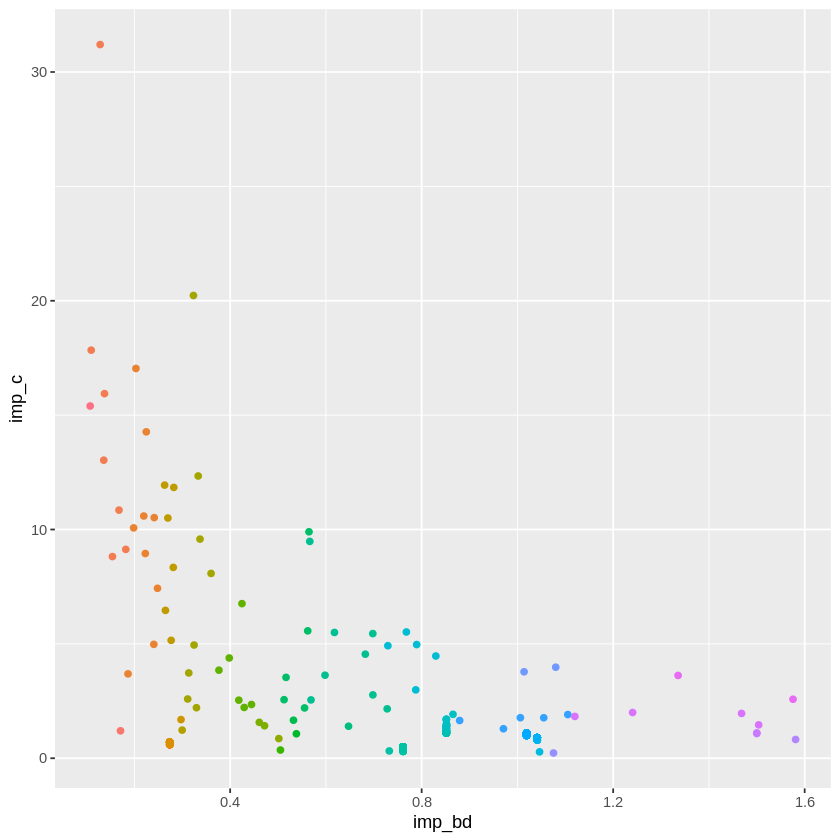

In [ ]:
# Subset data for HISOC and FIA datasets and specified depth increments
subset_dt <- combined_dt[source_dataset %in% c("HISOC", "FIA") &
                           (depth_top == 40 & depth_bottom == 60), ]

# # Define clusters based on bulk_density
subset_dt[,epsilon:=rnorm(nrow(subset_dt))*0.000001]
subset_dt[,bd_clusters:=cut(bulk_density, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(c_perc +epsilon, breaks = quantile(c_perc+epsilon,seq(0,1,.1),na.rm=T))]

# Calculate mean bulk_density for each cluster and c_perc
subset_dt[, mean_bd := mean(bulk_density, na.rm = TRUE), by = .( c_clusters)]

subset_dt[, mean_c := mean(c_perc, na.rm = TRUE), by = .(bd_clusters)]

subset_dt[, imp_bd := ifelse(!is.na(bulk_density),bulk_density,mean_bd)]

subset_dt[, imp_c := ifelse(!is.na(c_perc),c_perc,mean_c)]


# Define clusters based on bulk_density
subset_dt[,bd_clusters:=cut(imp_bd, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(imp_c, breaks = quantile(c_perc+epsilon,seq(0,1,.1),na.rm=T))]



subset_dt %>%
  ggplot(aes(x=imp_bd,y=imp_c))+
  geom_point(aes(color = paste(bd_clusters,c_clusters) )) +
  theme(legend.position = "none")

In [ ]:
combined_dt %>% names

[1] "number"                                    
  [2] "site_name"                                 
  [3] "site_number"                               
  [4] "plot_name"                                 
  [5] "plot_area"                                 
  [6] "depth_top"                                 
  [7] "depth_bottom"                              
  [8] "soil_column_id"                            
  [9] "replicate"                                 
 [10] "latitude"                                  
 [11] "longitude"                                 
 [12] "primary_project"                           
 [13] "secondary_project"                         
 [14] "tertiary project"                          
 [15] "land_ownership"                            
 [16] "old_sh_1"                                  
 [17] "sh_1"                                      
 [18] "barcode"                                   
 [19] "date_sampled"                              
 [20] "island"                                    
 [21] "current_land_use"                          
 [22] "years_under_current_land_use"              
 [23] "most_previous_land_use"                    
 [24] "years_under_most_previous _land_use"       
 [25] "additional_previous _land_use "            
 [26] "years_under_additional_previous _land_use" 
 [27] "additional_previous_land_use_2"            
 [28] "years_under_additional_previous_land_use_2"
 [29] "additional_previous_land_use_3"            
 [30] "years_under_additional_previous_land_use_3"
 [31] "current_plant_cover"                       
 [32] "previous_crop_cover"                       
 [33] "tillage"                                   
 [34] "tillage_frequency"                         
 [35] "herbicide"                                 
 [36] "pesticide"                                 
 [37] "irrigation_type"                           
 [38] "additional_soil_cover"                     
 [39] "soil_series"                               
 [40] "management_category"                       
 [41] "pial_none"                                 
 [42] "distlevel"                                 
 [43] "order"                                     
 [44] "minerals"                                  
 [45] "swc_fm"                                    
 [46] "swc_ad"                                    
 [47] "toc"                                       
 [48] "tn"                                        
 [49] "co2_burst"                                 
 [50] "beta_glucosidase"                          
 [51] "beta_glucosaminidase"                      
 [52] "pnm_init"                                  
 [53] "pmn_fin"                                   
 [54] "ph"                                        
 [55] "doc"                                       
 [56] "tdn"                                       
 [57] "din"                                       
 [58] "don"                                       
 [59] "hwec"                                      
 [60] "hwen"                                      
 [61] "whc"                                       
 [62] "wsa_mega"                                  
 [63] "wsa_macro"                                 
 [64] "bulk_density"                              
 [65] "shs"                                       
 [66] "assessment"                                
 [67] "c_n"                                       
 [68] "doc_don"                                   
 [69] "pmn"                                       
 [70] "status"                                    
 [71] "hyperlinks"                                
 [72] "last updated"                              
 [73] "unique_id"                                 
 [74] "pubid"                                     
 [75] "dataid"                                    
 [76] "location"                                  
 [77] "land_use"                                  
 [78] "soil_cover"                                
 [79] "soil_order"      

In [ ]:
# combined_dt[c_perc >5] %>%
#   ggplot(aes(x=depth_bottom %>% as.numeric,y = c_perc/max(c_perc)))+
#   geom_bin2d()+
#   geom_smooth(method = 'lm')

combined_dt[,c_perc_norm := c_perc]
combined_dt[,bd_norm := bulk_density]

combined_dt[,depth_mid := ((depth_bottom %>% as.numeric)+(depth_top %>% as.numeric))/2]

# combined_dt$depth_mid

c_perc_delta <- lm(c_perc_norm~depth_mid,combined_dt[c_perc >5 &!is.na(depth_mid) & !is.na(c_perc_norm)])
bd_delta <- lm(bd_norm~depth_mid,combined_dt[c_perc >5 &!is.na(depth_mid) & !is.na(bd_norm)])

predict(c_perc_delta,data.table(depth_mid = 19))-predict(c_perc_delta,data.table(depth_mid = 20))

1 
0.0898867

`geom_smooth()` using formula = 'y ~ x'


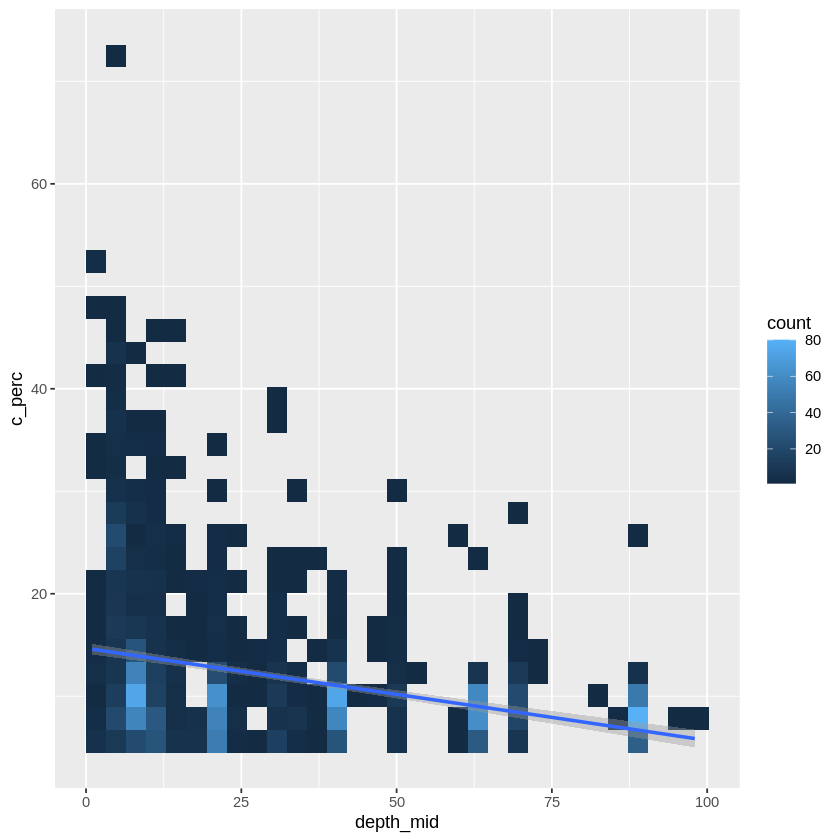

In [ ]:
# combined_dt[c_perc >5 &!is.na(depth_mid) & !is.na(c_perc_norm)] %>%
# ggplot(aes(x=depth_mid,y=c_perc))+
#   geom_bin2d() +
#   geom_smooth(method='lm')

Warning message:
“Removed 4142 rows containing non-finite outside the scale range
(`stat_bin2d()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4142 rows containing non-finite outside the scale range
(`stat_smooth()`).”


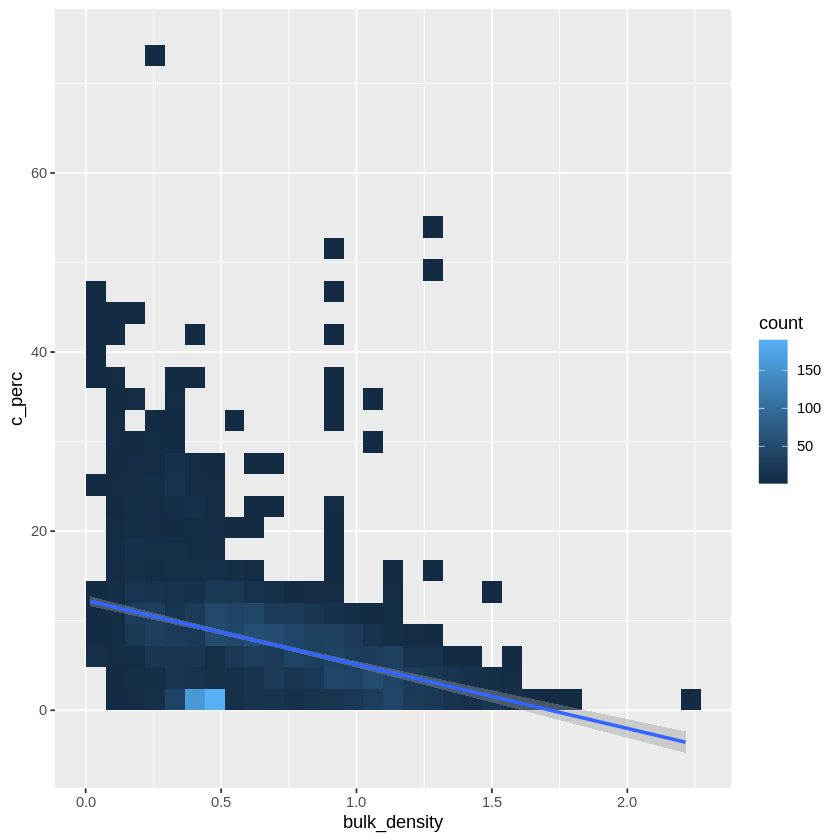

In [ ]:
combined_dt %>%
  ggplot(aes(x=bulk_density,y=c_perc))+
  geom_bin2d() +
  geom_smooth(method='lm')

In [ ]:
mid_points <- c(20,40,60,80,100)

In [ ]:
(predict(c_perc_delta,data.table(depth_mid = depth_mid))-predict(c_perc_delta,data.table(depth_mid = mid_points[which.min(sqrt((depth_mid-mid_points)^2))])) %>% unlist)

In [ ]:
depth_old = 10
depth_new = 100
c_perc = 13
c_perc*(predict(c_perc_delta,data.table(depth_mid = depth_new))/
predict(c_perc_delta,data.table(depth_mid = depth_old)))



1 
2.064601

In [ ]:
adj_carbon <- function(depth_orig,depth_new,c_perc){
c_perc*(predict(c_perc_delta,data.table(depth_mid = depth_new))/
predict(c_perc_delta,data.table(depth_mid = depth_old)))
}

In [ ]:
adj_bd <- function(depth_orig,depth_new,bulk_density){
bulk_density*(predict(bd_delta,data.table(depth_mid = depth_new))/
predict(bd_delta,data.table(depth_mid = depth_old)))
}

In [ ]:
depth_adj <- function(depth_mid){
mid_points[which.min(sqrt((depth_mid-mid_points+0.01)^2))]
}

In [ ]:
depth_mid = NULL

In [ ]:
# mid_points

In [ ]:
combined_dt[,depth_adj_bottom :=depth_adj(depth_mid),by=1:nrow(combined_dt)]

In [ ]:
bd_pred <- lm(bd_norm~depth_adj_bottom+c_perc_norm,combined_dt)
carb_pred <- lm(c_perc_norm ~depth_adj_bottom+bd_norm,combined_dt)


In [ ]:
bd_norm_pred <- predict(bd_pred,combined_dt)
carb_norm_pred <- predict(carb_pred,combined_dt)

In [ ]:
combined_dt$c_perc[is.na(combined_dt$c_per)] <- carb_norm_pred[is.na(combined_dt$c_per)]
combined_dt$bulk_density[is.na(combined_dt$bulk_density)] <- bd_norm_pred[is.na(combined_dt$bulk_density)]

In [ ]:
# combined_dt$depth_bottom

In [ ]:
combined_dt[,c_perc_adj :=adj_carbon(depth_bottom,depth_adj_bottom,c_perc),by=1:nrow(combined_dt)]

In [ ]:
combined_dt[,bulk_density_adj := adj_bd(depth_bottom,depth_adj_bottom,bulk_density),by=1:nrow(combined_dt)]

In [ ]:
# combined_dt$bulk_density %>% is.na() %>% table

Warning message:
“Removed 989 rows containing missing values or values outside the scale range
(`geom_point()`).”


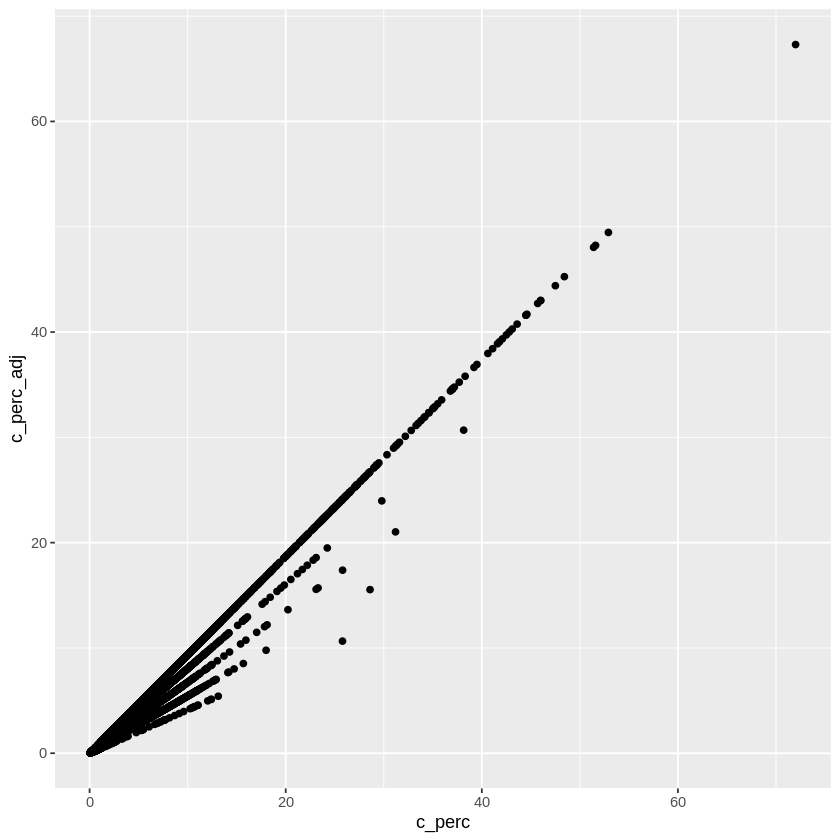

In [ ]:
combined_dt %>%
  ggplot(aes(x=c_perc,y=c_perc_adj))+
  geom_point()

Warning message:
“Removed 545 rows containing missing values or values outside the scale range
(`geom_point()`).”


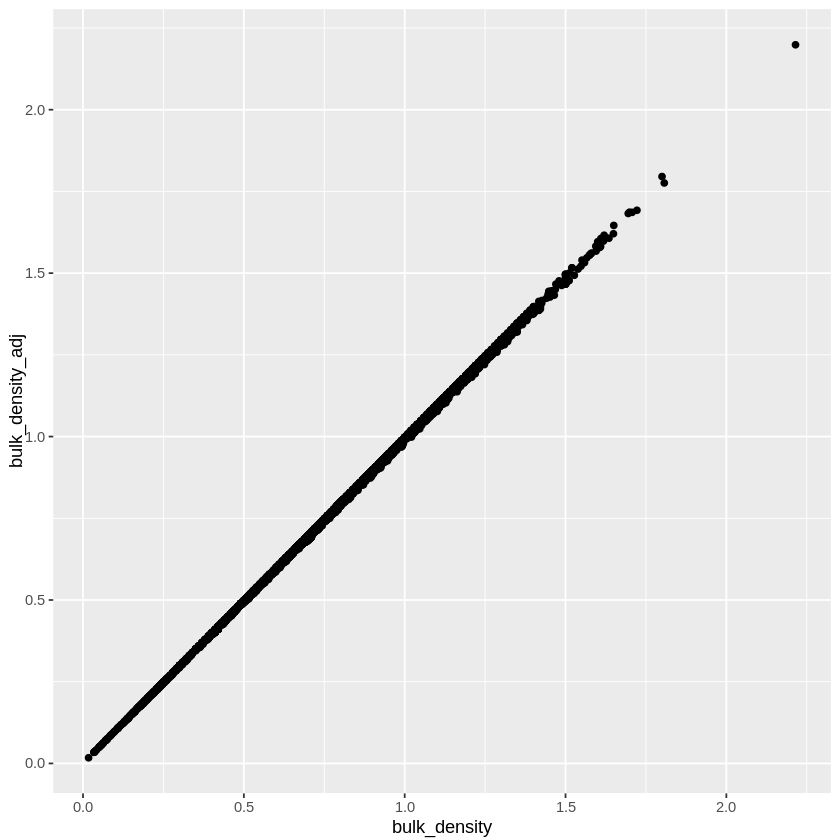

In [ ]:
combined_dt %>%
  ggplot(aes(x=bulk_density,y=bulk_density_adj))+
  geom_point()

In [ ]:
# subset_dt[, mean_bd := mean(bulk_density_adj, na.rm = TRUE), by = .( c_clusters,depth_adj_bottom,source_dataset)]


In [ ]:
subset_dt$c_clusters <- NULL
subset_dt$bd_clusters <- NULL

In [ ]:
subset_dt %>% nrow

[1] 6853

In [ ]:
subset_dt$imp_bd %>% is.na %>% table

.
FALSE 
 6853 

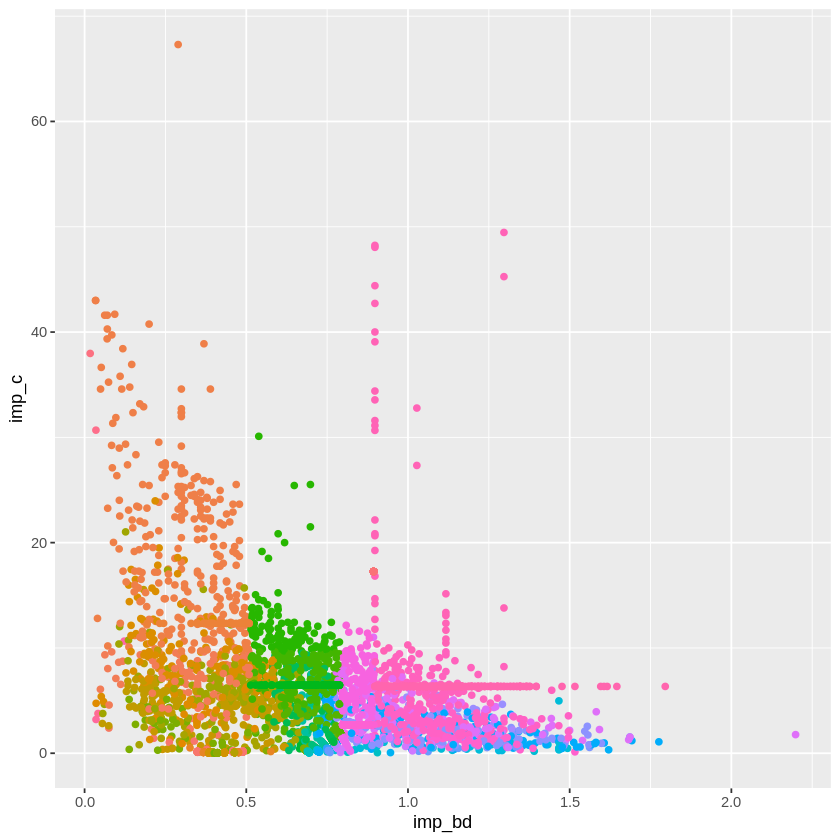

In [ ]:

subset_dt <- combined_dt[ , ]

# # Define clusters based on bulk_density
subset_dt[,epsilon:=rnorm(nrow(subset_dt))*0.000001]
subset_dt[,count_n:=length(source_dataset),by = .(depth_adj_bottom)]

subset_dt[,bd_clusters:=cut(bulk_density_adj , breaks = quantile((bulk_density_adj[!is.na(bulk_density_adj)] ),seq(0,1,.25),na.rm=T)),by = .(depth_adj_bottom)]
subset_dt[,c_clusters:=cut(c_perc_adj , breaks = quantile((c_perc_adj[!is.na(c_perc_adj)]),seq(0,1,.25),na.rm=T)),by = .(depth_adj_bottom)]

# subset_dt[,bd_clusters:=bd_clusters %>% paste %>% factor]
# subset_dt[,c_clusters:=c_clusters %>% paste %>% factor]


# Calculate mean bulk_density for each cluster and c_perc
subset_dt[, mean_bd := mean(bulk_density_adj, na.rm = TRUE), by = .( c_clusters)]

subset_dt[, mean_c := mean(c_perc_adj, na.rm = TRUE), by = .(bd_clusters)]

subset_dt[, imp_bd := ifelse(!is.na(bulk_density_adj),bulk_density_adj,mean_bd),by=1:nrow(subset_dt)]

subset_dt[, imp_c := ifelse(!is.na(c_perc_adj),c_perc_adj, mean_c)]


# Define clusters based on bulk_density
# subset_dt[,bd_clusters:=cut(imp_bd, breaks = quantile(bulk_density_adj +epsilon,seq(0,1,.25),na.rm=T)),by = .(depth_adj_bottom)]
# subset_dt[,c_clusters:=cut(imp_c, breaks = quantile(c_perc_adj+epsilon,seq(0,1,.25),na.rm=T)),by = .(depth_adj_bottom)]



subset_dt %>%
  ggplot(aes(x=imp_bd,y=imp_c))+
  geom_point(aes(color = paste(bd_clusters,c_clusters) )) +
  theme(legend.position = "none")

In [ ]:
# subset_dt[,.(latitude,longitude)]

In [ ]:
subset_dt$latitude

[1] "22.185643"   "22.185643"   "22.185643"   "22.185643"   "22.185643"  
   [6] "22.139481"   "22.139481"   "22.139481"   "22.139481"   "22.139481"  
  [11] "22.152306"   "22.152306"   "22.152306"   "22.152306"   "22.152306"  
  [16] "22.14805"    "22.14805"    "22.14805"    "22.14805"    "22.14805"   
  [21] "22.104642"   "22.104642"   "22.104642"   "22.104642"   "22.104642"  
  [26] "22.093798"   "22.093798"   "22.093798"   "22.093798"   "22.093798"  
  [31] "22.061723"   "22.061723"   "22.061723"   "22.061723"   "22.061723"  
  [36] "22.065455"   "22.065455"   "22.065455"   "22.065455"   "22.065455"  
  [41] "22.033569"   "22.033569"   "22.033569"   "22.033569"   "22.033569"  
  [46] "22.02998"    "22.02998"    "22.02998"    "22.02998"    "22.02998"   
  [51] "22.018736"   "22.018736"   "22.018736"   "22.018736"   "22.018736"  
  [56] "21.930728"   "21.930728"   "21.930728"   "21.930728"   "21.930728"  
  [61] "21.624626"   "21.624626"   "21.624626"   "21.624626"   "21.624626"  
  [66] "21.60624"    "21.60624"    "21.60624"    "21.60624"    "21.60624"   
  [71] "21.595483"   "21.595483"   "21.595483"   "21.595483"   "21.595483"  
  [76] "21.554911"   "21.554911"   "21.554911"   "21.554911"   "21.554911"  
  [81] "21.544455"   "21.544455"   "21.544455"   "21.544455"   "21.544455"  
  [86] "21.533719"   "21.533719"   "21.533719"   "21.533719"   "21.533719"  
  [91] "21.521719"   "21.521719"   "21.521719"   "21.521719"   "21.521719"  
  [96] "21.50362"    "21.50362"    "21.50362"    "21.50362"    "21.50362"   
 [101] "21.475448"   "21.475448"   "21.475448"   "21.475448"   "21.475448"  
 [106] "21.419936"   "21.419936"   "21.419936"   "21.419936"   "21.419936"  
 [111] "21.404189"   "21.404189"   "21.404189"   "21.404189"   "21.404189"  
 [116] "21.360723"   "21.360723"   "21.360723"   "21.360723"   "21.360723"  
 [121] "21.370018"   "21.370018"   "21.370018"   "21.370018"   "21.370018"  
 [126] "21.309059"   "21.309059"   "21.309059"   "21.309059"   "21.309059"  
 [131] "21.150058"   "21.150058"   "21.150058"   "21.150058"   "21.150058"  
 [136] "21.139404"   "21.139404"   "21.139404"   "21.139404"   "21.139404"  
 [141] "21.106669"   "21.106669"   "21.106669"   "21.106669"   "21.106669"  
 [146] "21.1015"     "21.1015"     "21.1015"     "21.1015"     "21.1015"    
 [151] "20.981401"   "20.981401"   "20.981401"   "20.981401"   "20.981401"  
 [156] "20.970892"   "20.970892"   "20.970892"   "20.970892"   "20.970892"  
 [161] "20.899926"   "20.899926"   "20.899926"   "20.899926"   "20.899926"  
 [166] "20.873974"   "20.873974"   "20.873974"   "20.873974"   "20.873974"  
 [171] "20.850315"   "20.850315"   "20.850315"   "20.850315"   "20.850315"  
 [176] "20.843283"   "20.843283"   "20.843283"   "20.843283"   "20.843283"  
 [181] "20.821086"   "20.821086"   "20.821086"   "20.821086"   "20.821086"  
 [186] "20.810614"   "20.810614"   "20.810614"   "20.810614"   "20.810614"  
 [191] "20.755849"   "20.755849"   "20.755849"   "20.755849"   "20.755849"  
 [196] "20.746101"   "20.746101"   "20.746101"   "20.746101"   "20.746101"  
 [201] "20.728275"   "20.728275"   "20.728275"   "20.728275"   "20.728275"  
 [206] "20.695859"   "20.695859"   "20.695859"   "20.695859"   "20.695859"  
 [211] "20.178895"   "20.178895"   "20.178895"   "20.178895"   "20.178895"  
 [216] "20.167855"   "20.167855"   "20.167855"   "20.167855"   "20.167855"  
 [221] "20.115834"   "20.115834"   "20.115834"   "20.115834"   "20.115834"  
 [226] "20.082268"   "20.082268"   "20.082268"   "20.082268"   "20.082268"  
 [231] "20.057349"   "20.057349"   "20.057349"   "20.057349"   "20.057349"  
 [236] "20.003017"   "20.003017"   "20.003017"   "20.003017"   "20.003017"  
 [241] "19.994248"   "19.994248"   "19.994248"   "19.994248"   "19.994248"  
 [246] "19.973328"   "19.973328"   "19.973328"   "19.973328"   "19.973328"  
 [251] "19.958861"   "19.958861"   "19.958861"   "19.958861"   "19.958861"  
 [256] "19.917661"   "19.917661"   "19.917661"   "19.917661"   "19.917661"  

In [ ]:
head(combined_dt)

number,site_name,site_number,plot_name,plot_area,depth_top,depth_bottom,soil_column_id,replicate,latitude,⋯,bulk_density_adj,epsilon,count_n,bd_clusters,c_clusters,mean_bd,mean_c,imp_bd,imp_c,n_lat_lon
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
NA,NA,NA,NA,NA,0,20,FIA_1060,NA,22.185643,⋯,1.0316864,2.291622e-06,2735,"(0.896,1.8]","(1.5,4.49]",0.8664027,6.3449812,1.0316864,3.9166817,5
NA,NA,NA,NA,NA,20,40,FIA_1060,NA,22.185643,⋯,1.2742756,3.466554e-07,994,"(0.778,2.2]","(1.13,4.75]",0.8539541,2.9511457,1.2742756,2.6139969,5
NA,NA,NA,NA,NA,40,60,FIA_1060,NA,22.185643,⋯,1.2253254,8.100486e-07,939,"(0.752,1.69]","(0.674,2.63]",0.9098208,2.2144503,1.2253254,1.3476891,5
NA,NA,NA,NA,NA,60,80,FIA_1060,NA,22.185643,⋯,1.3772522,1.014187e-06,898,"(0.722,1.78]","(0.38,2.47]",0.8712697,1.9012575,1.3772522,0.8639779,5
NA,NA,NA,NA,NA,80,100,FIA_1060,NA,22.185643,⋯,1.4934776,-5.345484e-07,1287,"(0.692,1.49]","(0.248,10.6]",0.6791508,0.2572493,1.4934776,0.4665998,5
NA,NA,NA,NA,NA,0,20,FIA_1076,NA,22.139481,⋯,0.2255398,5.591130e-07,2735,"(0.0173,0.511]","(9.63,67.3]",0.4527264,12.3358725,0.2255398,17.1997479,5


In [ ]:
combined_dt[,n_lat_lon:=length(unique_id),by=.(latitude,longitude)]

In [ ]:
combined_dt$soil_column_id %>% table %>% unlist %>% table %>% sum

[1] 1975

In [ ]:
summary_table <- combined_dt[, .(mean_c_perc = mean(c_perc_adj, na.rm = TRUE),
                                 min_c_perc = min(c_perc_adj, na.rm = TRUE),
                                 max_c_perc = max(c_perc_adj, na.rm = TRUE),
                                 mean_bulk_density = mean(bulk_density_adj, na.rm = TRUE),
                                 min_bulk_density = min(bulk_density_adj, na.rm = TRUE),
                                 max_bulk_density = max(bulk_density_adj, na.rm = TRUE)),
                            by = .(source_dataset, depth_top, depth_bottom)] %>% print



     source_dataset depth_top depth_bottom mean_c_perc min_c_perc max_c_perc
             <fctr>    <char>       <char>       <num>      <num>      <num>
  1:            FIA         0           20    9.210311 0.37390756   37.97031
  2:            FIA        20           40    5.813679 0.22520588   30.68430
  3:            FIA        40           60    3.766141 0.15498424   21.02395
  4:            FIA        60           80    2.579866 0.05977206   15.54074
  5:            FIA        80          100    1.785016 0.05367962   10.64921
 ---                                                                        
310:             SH        10           30         NaN         NA         NA
311:             SH         0           10         NaN         NA         NA
312:             SH        28           46         NaN         NA         NA
313:             SH        46           66         NaN         NA         NA
314:             SH        66          100         NaN         NA         NA

not calculating C stock below 1 m since no bulk density estimates for those data

In [ ]:
subset_dt %>% names

[1] "number"                                    
  [2] "site_name"                                 
  [3] "site_number"                               
  [4] "plot_name"                                 
  [5] "plot_area"                                 
  [6] "depth_top"                                 
  [7] "depth_bottom"                              
  [8] "soil_column_id"                            
  [9] "replicate"                                 
 [10] "latitude"                                  
 [11] "longitude"                                 
 [12] "primary_project"                           
 [13] "secondary_project"                         
 [14] "tertiary project"                          
 [15] "land_ownership"                            
 [16] "old_sh_1"                                  
 [17] "sh_1"                                      
 [18] "barcode"                                   
 [19] "date_sampled"                              
 [20] "island"                                    
 [21] "current_land_use"                          
 [22] "years_under_current_land_use"              
 [23] "most_previous_land_use"                    
 [24] "years_under_most_previous _land_use"       
 [25] "additional_previous _land_use "            
 [26] "years_under_additional_previous _land_use" 
 [27] "additional_previous_land_use_2"            
 [28] "years_under_additional_previous_land_use_2"
 [29] "additional_previous_land_use_3"            
 [30] "years_under_additional_previous_land_use_3"
 [31] "current_plant_cover"                       
 [32] "previous_crop_cover"                       
 [33] "tillage"                                   
 [34] "tillage_frequency"                         
 [35] "herbicide"                                 
 [36] "pesticide"                                 
 [37] "irrigation_type"                           
 [38] "additional_soil_cover"                     
 [39] "soil_series"                               
 [40] "management_category"                       
 [41] "pial_none"                                 
 [42] "distlevel"                                 
 [43] "order"                                     
 [44] "minerals"                                  
 [45] "swc_fm"                                    
 [46] "swc_ad"                                    
 [47] "toc"                                       
 [48] "tn"                                        
 [49] "co2_burst"                                 
 [50] "beta_glucosidase"                          
 [51] "beta_glucosaminidase"                      
 [52] "pnm_init"                                  
 [53] "pmn_fin"                                   
 [54] "ph"                                        
 [55] "doc"                                       
 [56] "tdn"                                       
 [57] "din"                                       
 [58] "don"                                       
 [59] "hwec"                                      
 [60] "hwen"                                      
 [61] "whc"                                       
 [62] "wsa_mega"                                  
 [63] "wsa_macro"                                 
 [64] "bulk_density"                              
 [65] "shs"                                       
 [66] "assessment"                                
 [67] "c_n"                                       
 [68] "doc_don"                                   
 [69] "pmn"                                       
 [70] "status"                                    
 [71] "hyperlinks"                                
 [72] "last updated"                              
 [73] "unique_id"                                 
 [74] "pubid"                                     
 [75] "dataid"                                    
 [76] "location"                                  
 [77] "land_use"                                  
 [78] "soil_cover"                                
 [79] "soil_order"      

In [ ]:
output_dt <- subset_dt[, .(c_perc,imp_c, bulk_density,imp_bd), by = .(source_dataset,island,soil_column_id,unique_id, depth_top, depth_bottom,depth_adj_bottom,latitude,longitude)]

In [ ]:
output_dt %>% lapply(is.na) %>% lapply(which) %>% lapply(length)

$source_dataset
[1] 0

$island
[1] 0

$soil_column_id
[1] 0

$unique_id
[1] 0

$depth_top
[1] 0

$depth_bottom
[1] 0

$depth_adj_bottom
[1] 0

$latitude
[1] 0

$longitude
[1] 0

$c_perc
[1] 989

$imp_c
[1] 0

$bulk_density
[1] 545

$imp_bd
[1] 0

In [ ]:
output_dt$hole_id <- paste(output_dt$latitude,output_dt$longitude) %>% factor %>% as.numeric

In [ ]:
output_dt$hole_id %>% table %>% unlist %>% table

.
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 366   60   35    6  299    3    2    8    4    5    3   15    2    3   13    7 
  17   18   19   20   21   22   24   36   45   59  132  360  627  628  678 1197 
   3    3    1    1    1    1    1    1    1    1    1    1    1    1    1    1 

In [ ]:
# table(output_dt$depth_bottom,output_dt$depth_adj_bottom)
names(output_dt)

[1] "source_dataset"   "island"           "soil_column_id"   "unique_id"       
 [5] "depth_top"        "depth_bottom"     "depth_adj_bottom" "latitude"        
 [9] "longitude"        "c_perc"           "imp_c"            "bulk_density"    
[13] "imp_bd"           "hole_id"

In [ ]:
fwrite(output_dt,'/content/combined_soc_2024_04_02.csv')

In [ ]:
# combined_dt[, .(c_perc, bulk_density), by = .(source_dataset, depth_top, depth_bottom)]

In [ ]:
# SH_dt_sub <- SH_dt[depth_bottom == 15]

# summary_table <- SH_dt_sub[, .(
#   mean_SOC_stock_Mg_ha = mean(SOC_stock_Mg_ha,  na.rm = TRUE),
#   n_obs = .N,
#   se_SOC_stock_Mg_ha = sd(SOC_stock_Mg_ha, na.rm = TRUE) / sqrt(.N)
# ), by = .(current_land_use, minerals)]

# print(summary_table)